# To get started , we import the nacessary tools . 

In [2]:
import numpy as np # for numerical computations 
import pandas as pd  # for data cleaning and manipulation 
import matplotlib.pyplot as plt # for basic plotting 
import seaborn as sns # for enhaced statistical visualization 
%matplotlib inline  
# -> this line ensures that matplotlib plots appear inline in the notebook 

we want to load dataset and name it (Df) 

In [3]:
df=sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


---
# the frist step : is to analyze each column one by one and define what each represents
- survived : indicates whether the passengers on board the Titanic are alive or dead, with 0 indicating death and 1 indicating life.


- pclass : There are three cabins or three floors on this ship, which are floors 1, 2, and 3, respectively, and this column indicates the location of passengers in different classes.


- sex : the sex column represents the gender of the passengers on the Titanic.


- age : The Age column represents the age of the Titanic passengers.


- sibsp :  The sibsp column shows how many siblings or spouses each passenger had on board.


- parch : The parch shows how many parents or children each passenger had with them on the ship.


- fare :  The fare column indicates the price of each ticket that the passenger paid to board this ship.


- embarked : The embarked column in the Titanic dataset indicates which port the passenger boarded the Titanic from.
C=Cherbourg------S=Southampton------Q=Queenstown



- class : There are three cabins or three floors on this ship, which are floors 1, 2, and 3, respectively, and this column indicates the location of passengers in different classes.(But in this column it is not written as a number, but as a string)


- who : The who column shows the same gender as man and women.


- adult_male :  The adult male column in the Titanic dataset is a Boolean column that indicates whether the passenger was an adult male or not . True = male and age>=18 ------ false= female and age<18 .


- deck : The deck column in the Titanic dataset indicates which deck or upper floor of the ship the passenger stayed on.


- embark_town : The embarked column in the Titanic dataset indicates which port the passenger boarded the Titanic from.


- alive : The alive column represents a string indicating whether the passengers survived or not.


- alone : The "alone" sign indicates whether or not the passengers are alone.

---



# Now that we have the concept of all the columns, we move on to the second step of cleaning the dataset:

In [4]:
# Checking whether there are missing values ​​in the existing dataset:
df.isna().any()
 # # # according to this command, we found that there are missing values ​​in the (age) column, the (deck) column, and the (embarked) and (embark town) columns

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [5]:
# Now I want to find the percentage of missing values ​​in each column:
(df.isna().sum() / len(df) *100).round(2).sort_values(ascending=False)
# # # 
# According to this command, we understood that the highest missing value in the form of Nan shown in the deck column is 77%, and after that in the age and ebmraked columns, it is 19% and 0.22%, respectively.


deck           77.22
age            19.87
embarked        0.22
embark_town     0.22
sex             0.00
pclass          0.00
survived        0.00
fare            0.00
parch           0.00
sibsp           0.00
class           0.00
adult_male      0.00
who             0.00
alive           0.00
alone           0.00
dtype: float64

In [6]:
#Now we consider the number of missing values ​​in each column:
df.isna().sum().sort_values(ascending=False)
# # #

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

# Before we examine the missing values ​​in each column, we check whether each column has outliers or not by taking a unique value from each column:

In [7]:
# survived column : # 1
df['survived'].unique() 
### there is no outlier 


array([0, 1])

In [8]:
# pclass column : # 2
df['pclass'].unique()
### there is no outlier 

array([3, 1, 2])

In [9]:
# sex column : # 3 
df['sex'].unique()
### there is no outlier 

array(['male', 'female'], dtype=object)

In [10]:
# age column : # 4 
df['age'].unique() 
### there is an outlier             (******)
# With this command, we found ages that are less than one year old, which doesn't make sense

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [11]:
# sibsp column : # 5 
df['sibsp'].unique() 
### there is no outlier  I'm not too sure :/ 

array([1, 0, 3, 4, 2, 5, 8])

In [12]:
# parch column : #6 
df['parch'].unique()
### there is no outlier 

array([0, 1, 2, 5, 3, 4, 6])

In [13]:
# fare columnc: #7 
df['fare'].unique()
### Needs further investigation               (******)

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [14]:
# embarked column : #8 
df['embarked'].unique()
# there is an outlier ----> (nan)     (******)

array(['S', 'C', 'Q', nan], dtype=object)

In [15]:
# class column : #9 
df['class'].unique() 
# there is no outlier 

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [16]:
# who column : #10 
df['who'].unique() 
# there is no outlier 

array(['man', 'woman', 'child'], dtype=object)

In [17]:
# adult_male column : #11 
df['adult_male'].unique()
# there is not outlier 

array([ True, False])

In [18]:
# deck column : #12 
df['deck'].unique() 
# there is no outlier 

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [19]:
# alive column : #13 
df['alive'].unique()
# ther is no outlier 

array(['no', 'yes'], dtype=object)

In [20]:
# alone column : #14 
df['alone'].unique()
# there is no outlier 


array([False,  True])

Conclusion: According to the above commands, the columns that need to be checked for outliers are as follows: 
1. (Embraked column ) 
2. (fare column )
3. (sibsp column) ^
4. (age column ) ^

# After analyzing and reviewing the columns of the existing dataset with the conclusions we had, we begin cleaning them logically and with reason and argument : 

In [21]:
#review and clening column 'deck'
df.drop(columns='deck',inplace=True)
#the 'deck' column was removed because it contained around 77% missing values , making it unrelilaable . 

In [22]:
# review and claning column 'age'
df['age']=df['age'].fillna(df['age'].median())
###

---
the missing value in the 'age' column were imputed using the median ,as it is less affected by extreme values .
how ever some invalid enttries (such as perecentages or non-numeric data ) were detected in this column . 
these values will be reviewed and either corrected or removed to maintain data quality and consistency .

---

In [23]:
# review column 'age' 
df[df['age']<1]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
78,1,2,male,0.83,0,2,29.0000,S,Second,child,False,Southampton,yes,False
305,1,1,male,0.92,1,2,151.5500,S,First,child,False,Southampton,yes,False
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,Cherbourg,yes,False
644,1,3,female,0.75,2,1,19.2583,C,Third,child,False,Cherbourg,yes,False
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,Southampton,yes,False
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,Cherbourg,yes,False
831,1,2,male,0.83,1,1,18.7500,S,Second,child,False,Southampton,yes,False


In [24]:
df['age'].dtype

dtype('float64')

---
some 'age' values were recorded as decimals (e.g,0.85,0.92,0.75 and...) representing infants ypunger than one year old .
these values  are valid and were kept in the dataset as the provide accurate information about passenger ages .

---

In [25]:
df['age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [26]:
#cheking outlier 
Q1 = df['age'].quantile(0.25)
Q2 = df['age'].quantile(0.75)
IQR=Q2-Q1
lower_bound =Q1-1.5*IQR
upper_bound=Q2+1.5*IQR
outliers_column_age=df[(df['age']<lower_bound) | (df['age']>upper_bound)]


---
the interquartile range (IQR) method identifies outliers by measuring the sparead of the middle 50% of data . values below Q1-1.5*IQR or above Q2+1.5*IQR are considered potential outliers.

---

In [27]:
# review column 'sibsp'  
df['sibsp'].unique() 


array([1, 0, 3, 4, 2, 5, 8])

In [28]:
Q1sibsp=df['sibsp'].quantile(0.25)
Q2sibsp=df['sibsp'].quantile(0.75)
IQRsibsp=Q2sibsp-Q1sibsp
lower_bound2=Q1sibsp-1.5*IQRsibsp
upper_bound2=Q2sibsp+1.5*IQRsibsp
outliers_column_sibsp=df[(df['sibsp']<lower_bound2) | (df['sibsp']>upper_bound2)]




doubt cleared about column 'sibsp'

In [29]:
# review column 'fare'  
df['fare'].min()

np.float64(0.0)

In [30]:
df[df['fare']<0]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone


In [31]:
df[df['fare']==0]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
179,0,3,male,36.0,0,0,0.0,S,Third,man,True,Southampton,no,True
263,0,1,male,40.0,0,0,0.0,S,First,man,True,Southampton,no,True
271,1,3,male,25.0,0,0,0.0,S,Third,man,True,Southampton,yes,True
277,0,2,male,28.0,0,0,0.0,S,Second,man,True,Southampton,no,True
302,0,3,male,19.0,0,0,0.0,S,Third,man,True,Southampton,no,True
413,0,2,male,28.0,0,0,0.0,S,Second,man,True,Southampton,no,True
466,0,2,male,28.0,0,0,0.0,S,Second,man,True,Southampton,no,True
481,0,2,male,28.0,0,0,0.0,S,Second,man,True,Southampton,no,True
597,0,3,male,49.0,0,0,0.0,S,Third,man,True,Southampton,no,True
633,0,1,male,28.0,0,0,0.0,S,First,man,True,Southampton,no,True


---
some passengers have a fare value of 0 , which is not an error . this usually occurs because certain individuals(such as crew members,children , or family members on a group ticket) did not separately . therefore ,these values are not considered outliers and will be kept in the datset . 

---

doubt cleared about column 'sibsp'

In [32]:
## review column 'embark_town' and 'embarked'
df['embark_town'].isna().sum()
  

np.int64(2)

In [33]:
df['embarked'].isna().sum()

np.int64(2)

In [34]:
df['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [35]:
df['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [36]:
df.groupby(['embarked','embark_town']).size()
# so we conclude that these two columns have equal values . 

embarked  embark_town
C         Cherbourg      168
Q         Queenstown      77
S         Southampton    644
dtype: int64

In [37]:
df.drop(columns=['embarked'],inplace=True)

---
the columns 'emnarked' and 'embark_town' contain same information , wit 'embarked' being a short -coded version of the ull town name. since they are redundant and this project does not involve model building , the encoded column ('embarked') was removed , and the more descriptive 'embark_town' column was kept. 

---

In [38]:
df['embark_town'].isna().sum()

np.int64(2)

In [39]:
df['embark_town'].fillna('Southampton',inplace=True)


C:\Users\ZRS\AppData\Local\Temp\ipykernel_10164\66256724.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embark_town'].fillna('Southampton',inplace=True)


In [40]:
df['embark_town'].isna().sum()

np.int64(0)

---
the missing value in the 'embark_town' column were filled with 'southampton' ,since the majority of passengers embarked from southampton . this is a reasonable and commonly used approach because it preserves the overall distribution of the feature . 

---

In [41]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

# data cleaned 

In [42]:
df.corr(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


---
# remove duplicate or equvivalent columns 
survived <--> alive


pclass <--> class


since we are not building a model , we remove 'survived' and 'pclass' as well. 

---

In [43]:
df.drop(columns=['pclass','survived'],inplace=True)

In [44]:
df

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True
887,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True
888,female,28.0,1,2,23.4500,Third,woman,False,Southampton,no,False
889,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True


# i want to create some new feature that will make analysis easier . 

In [45]:
df['family_size']=df['sibsp']+df['parch'] + 1 


In [46]:
df['age_group']=pd.cut(df['age'],bins=[0,12,18,40,60,120],labels=['child','teen','adult','middle_age','senior'])



---
Two new features were created to enhance the dataset:

1. Family Size: The 'family_size' column was created by summing the number of siblings/spouses ('sibsp') and parents/children ('parch') for each passenger, and adding 1 to include the passenger themselves. This feature represents the total number of family members on board.

2. Age Group: The 'age_group' column was created by categorizing passengers' ages into bins such as 'child', 'teen', 'adult', 'middle_age', and 'senior'. This allows for easier analysis of patterns based on age categories rather than exact ages.
---

In [47]:
df.drop(columns='adult_male',inplace=True)


In [48]:
df

,sex,age,sibsp,parch,fare,class,who,embark_town,alive,alone,family_size,age_group
0,male,22.0,1,0,7.2500,Third,man,Southampton,no,False,2,adult
1,female,38.0,1,0,71.2833,First,woman,Cherbourg,yes,False,2,adult
2,female,26.0,0,0,7.9250,Third,woman,Southampton,yes,True,1,adult
3,female,35.0,1,0,53.1000,First,woman,Southampton,yes,False,2,adult
4,male,35.0,0,0,8.0500,Third,man,Southampton,no,True,1,adult
...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,Southampton,no,True,1,adult
887,female,19.0,0,0,30.0000,First,woman,Southampton,yes,True,1,adult
888,female,28.0,1,2,23.4500,Third,woman,Southampton,no,False,4,adult
889,male,26.0,0,0,30.0000,First,man,Cherbourg,yes,True,1,adult


---
## 1. Data Cleaning

The dataset has been cleaned and prepared for analysis. The following steps were performed:

- Duplicate and redundant columns removed: Columns such as survived, pclass, and other duplicates were removed to simplify the dataset.
- Missing values handled: Missing values in columns like Age and Embarked were filled using median imputation or the most frequent value.
- Outliers managed: Outliers in numerical columns such as Age and Fare were detected and removed to ensure reliable analysis.

## 2. Feature Engineering

Two new features were created to enhance the dataset:

1. Family Size: The family_size column was created by summing sibsp and parch and adding 1 to include the passenger themselves. This feature represents the total number of family members on board.
2. Age Group: The age_group column was created by categorizing passengers' ages into bins: child, teen, adult, middle_age, and senior. This allows for easier analysis of patterns based on age categories rather than exact ages.

These steps ensured the dataset is clean, consistent, and enriched for exploratory analysis

--- 

C:\Users\ZRS\AppData\Local\Temp\ipykernel_10164\957189037.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex',y='age',data=df,palette=colors)


Text(0, 0.5, 'age')

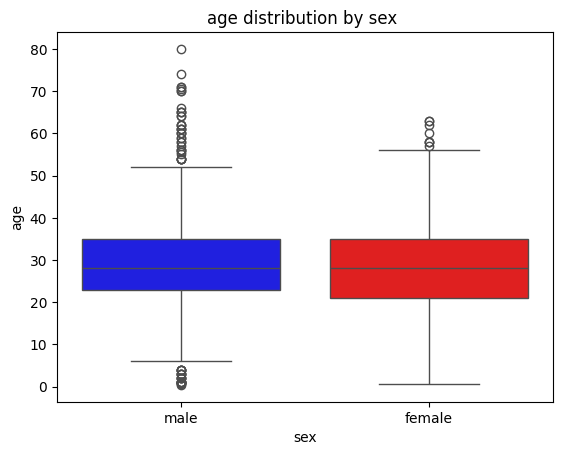

In [ ]:
# age distribution by sex 
colors={'male':'blue','female':'red'}
sns.boxplot(x='sex',y='age',data=df,palette=colors)
plt.title('age distribution by sex ')
plt.xlabel('sex')
plt.ylabel('age')


## Age Distribution by Sex

A boxplot was used to visualize the relationship between sex and age.  
It clearly shows the median, quartiles, and outliers for each gender, allowing easy comparison of age patterns between male and female passengers

In [ ]:
# fare distribution by sex 
df.groupby('sex')['fare'].max() 

sex
female    512.3292
male      512.3292
Name: fare, dtype: float64

In [ ]:
df.groupby('sex')['fare'].mean()

sex
female    44.479818
male      25.523893
Name: fare, dtype: float64

C:\Users\ZRS\AppData\Local\Temp\ipykernel_10164\401650896.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='sex',y='fare',data=df,palette=colors)
c:\Users\ZRS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 56.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ZRS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 28.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(38.347222222222214, 0.5, 'fare')

c:\Users\ZRS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 65.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ZRS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 42.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


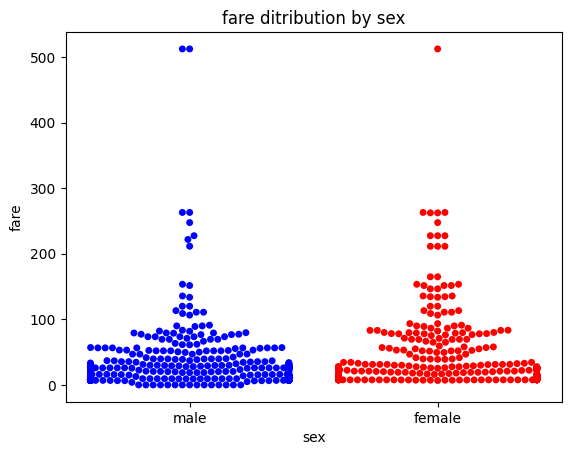

In [ ]:
# fare distribution by sex 
sns.swarmplot(x='sex',y='fare',data=df,palette=colors)
plt.title('fare ditribution by sex')
plt.xlabel('sex')
plt.ylabel('fare')

## Fare Analysis by Sex

The analysis of ticket prices shows that the highest individual fares were paid by female passengers, while the average fare is slightly higher for male passengers.  
This indicates that although some women paid the most expensive tickets, men paid more on average overall.

In [ ]:
# class distribution by sex 
pd.crosstab(df['sex'],df['class'])

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


In [ ]:
df['sex'].value_counts() 

sex
male      577
female    314
Name: count, dtype: int64

Text(0, 0.5, 'count')

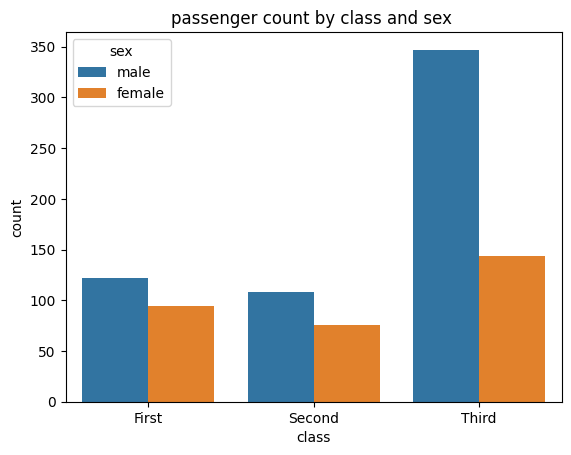

In [ ]:
sns.countplot(x='class',hue='sex',data=df)
plt.title('passenger count by class and sex ')
plt.xlabel('class')
plt.ylabel('count')

## Passenger Distribution by Sex and Class

The distribution of passengers by sex and class shows the following:

- Female passengers: 94 in First Class, 76 in Second Class, and 144 in Third Class.  
- Male passengers: 122 in First Class, 108 in Second Class, and 347 in Third Class.  

Overall, the total number of male passengers is higher than female passengers across all classes.  
The majority of both male and female passengers traveled in Third Class, while First Class had the fewest passengers for both genders

In [ ]:
# alive distribution sex 
pd.crosstab(df['sex'],df['alive'])

alive,no,yes
sex,,
female,81,233
male,468,109


Text(0.5, 1.0, 'survived by sex ')

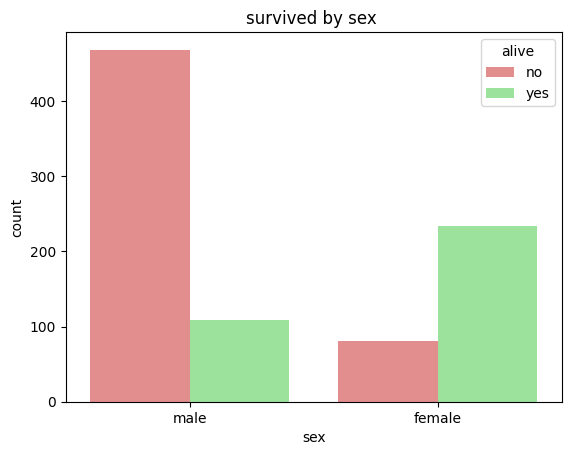

In [ ]:
sns.countplot(x='sex',hue='alive',data=df,palette={'no':'lightcoral','yes':'lightgreen'})
plt.title('survived by sex ')

## alive Analysis by Sex

The visualization shows that most female passengers survived (233 survived vs 81 deceased),  
while most male passengers did not survive (109 survived vs 468 deceased).  
This highlights a clear difference in survival rates between genders

In [ ]:
# sex distribution alone 
pd.crosstab(df['sex'],df['alone'])  

alone,False,True
sex,,
female,188,126
male,166,411


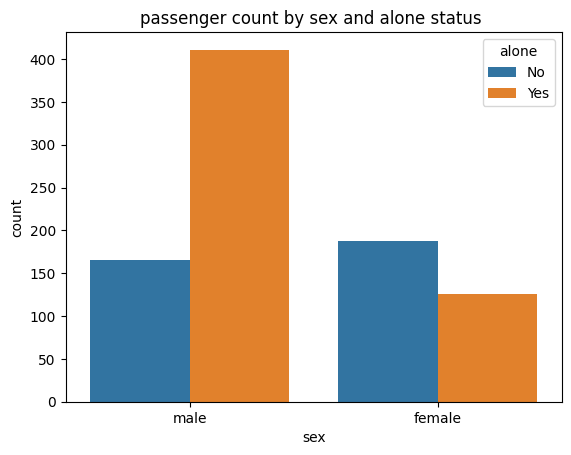

In [ ]:
sns.countplot(x='sex',hue='alone',data=df)
plt.title('passenger count by sex and alone status ')
plt.xlabel('sex')
plt.ylabel('count')
plt.legend(title='alone',labels=['No','Yes'])

## Alone Status Analysis by Sex

The analysis of passengers' alone status shows the following:

- Male passengers: 411 were alone and 166 were with family.  
- Female passengers: 126 were alone and 188 were with family.  

This indicates that the number of males traveling alone was more than twice the number of females traveling alone.  
In contrast, more females were traveling with family compared to males.

In [ ]:
df

,sex,age,sibsp,parch,fare,class,who,embark_town,alive,alone,family_size,age_group
0,male,22.0,1,0,7.2500,Third,man,Southampton,no,False,2,adult
1,female,38.0,1,0,71.2833,First,woman,Cherbourg,yes,False,2,adult
2,female,26.0,0,0,7.9250,Third,woman,Southampton,yes,True,1,adult
3,female,35.0,1,0,53.1000,First,woman,Southampton,yes,False,2,adult
4,male,35.0,0,0,8.0500,Third,man,Southampton,no,True,1,adult
...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,Southampton,no,True,1,adult
887,female,19.0,0,0,30.0000,First,woman,Southampton,yes,True,1,adult
888,female,28.0,1,2,23.4500,Third,woman,Southampton,no,False,4,adult
889,male,26.0,0,0,30.0000,First,man,Cherbourg,yes,True,1,adult


In [ ]:
# embark_town distribution sex 
pd.crosstab(df['sex'],df['embark_town'])

embark_town,Cherbourg,Queenstown,Southampton
sex,,,
female,73,36,205
male,95,41,441


Text(0, 0.5, 'count')

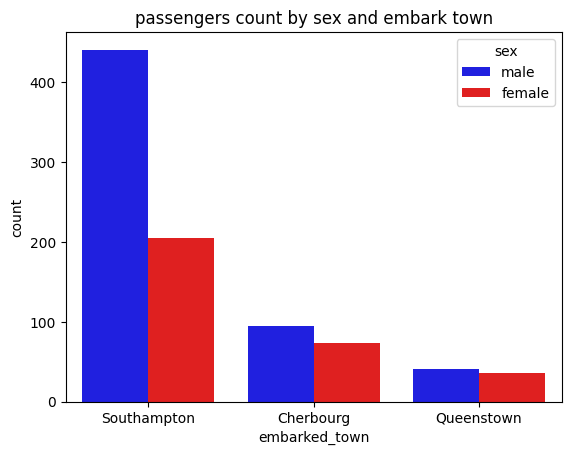

In [ ]:
sns.countplot(data=df,x='embark_town',hue='sex',palette=colors)
plt.title('passengers count by sex and embark town')
plt.xlabel('embarked_town')
plt.ylabel('count')

## Passenger Distribution by Sex and Embark Town

The distribution of passengers by sex and embark town is as follows:

- Female passengers: 73 from Cherbourg, 36 from Queenstown, and 205 from Southampton.  
- Male passengers: 95 from Cherbourg, 41 from Queenstown, and 441 from Southampton.  

Overall, male passengers outnumbered female passengers at all embarkation points.  
At Southampton, the number of males was roughly twice the number of females, while at the other two towns the numbers were closer between genders.

In [ ]:
pd.crosstab(df['sex'],df['age_group'])

age_group,child,teen,adult,middle_age,senior
sex,,,,,
female,32,36,198,45,3
male,37,34,404,83,19


Text(0, 0.5, 'count')

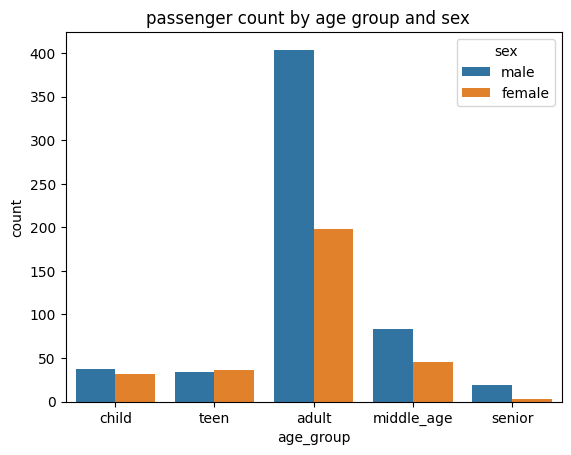

In [ ]:
sns.countplot(data=df,x='age_group',hue='sex')
plt.title('passenger count by age group and sex  ')
plt.xlabel('age_group')
plt.ylabel('count')

## Passenger Distribution by Age Group and Sex

The analysis of passengers by age group and sex shows the following patterns:

- The majority of passengers in both genders are adults (18-40 years old).  
- The next largest group is middle-aged (40-60 years old).  
- Senior passengers (80-120 years old) are the least represented, totaling only 22 individuals.  

This indicates that most passengers were adults, with fewer middle-aged and very few senior passengers.  
The distribution is similar across male and female passengers.

C:\Users\ZRS\AppData\Local\Temp\ipykernel_10164\2212589141.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex',y='age',data=df,palette=colors,ax=axes[0])
C:\Users\ZRS\AppData\Local\Temp\ipykernel_10164\2212589141.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='sex',y='fare',data=df,palette=colors,ax=axes[1])
c:\Users\ZRS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 56.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ZRS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 26.1% 

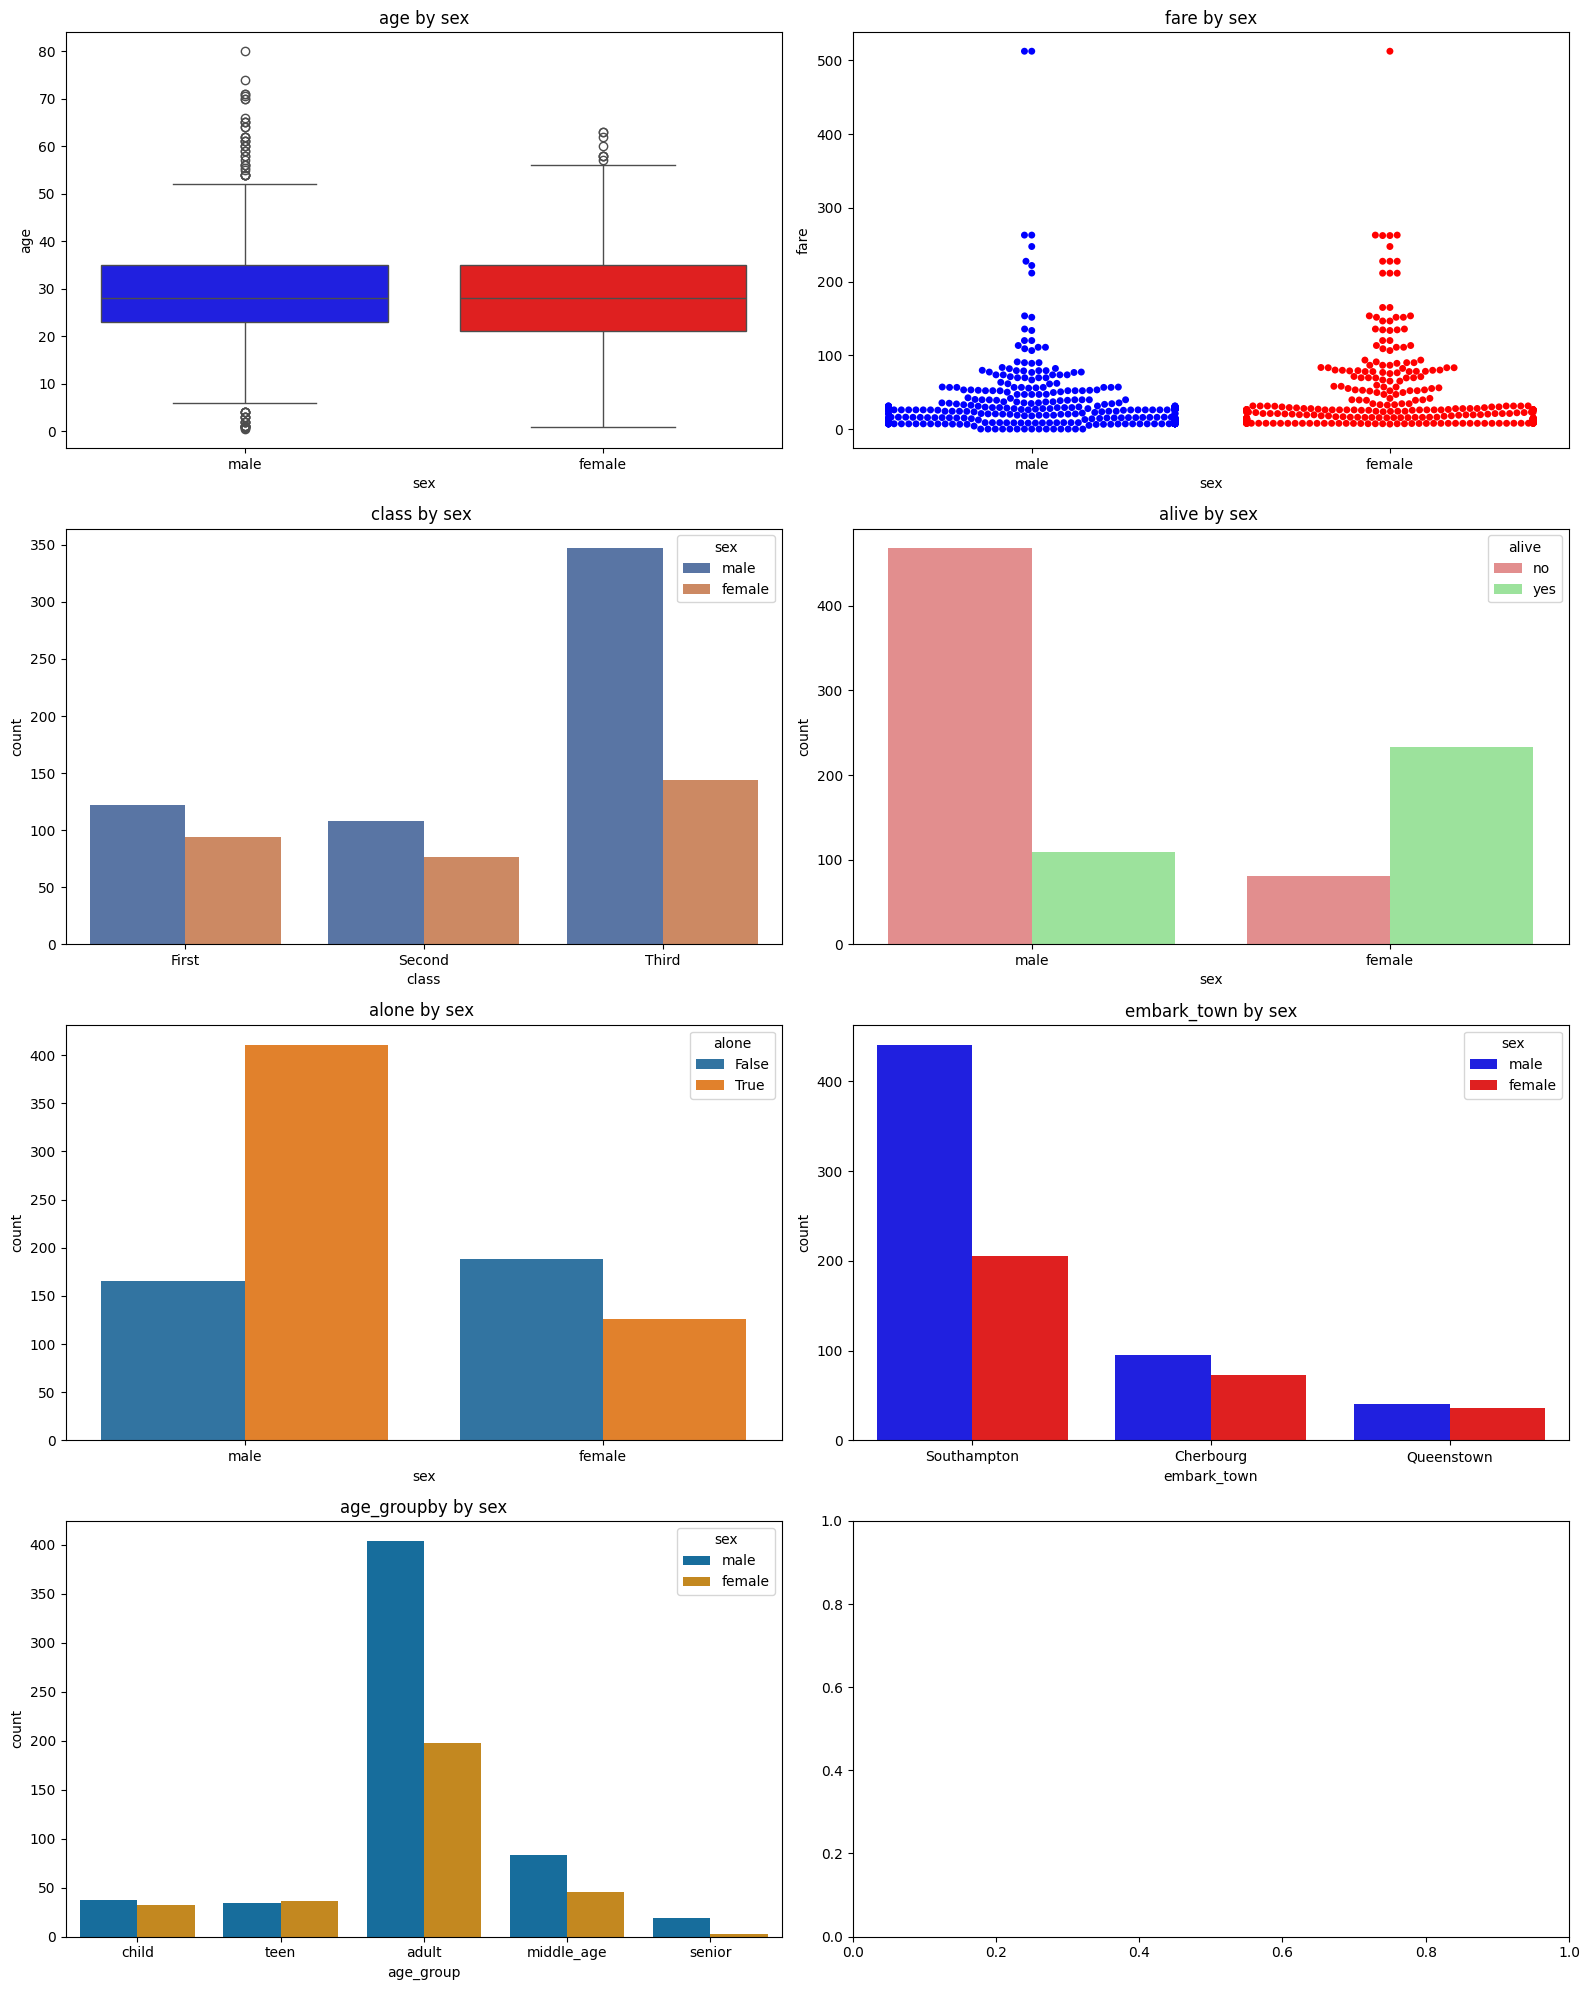

In [ ]:
# figure 
fig,axes=plt.subplots(4,2,figsize=(16,20))
axes=axes.flatten() 
# age distribution by sex 
colors={'male':'blue','female':'red'}
sns.boxplot(x='sex',y='age',data=df,palette=colors,ax=axes[0])
axes[0].set_title('age by sex')
# fare distribution by sex 
sns.swarmplot(x='sex',y='fare',data=df,palette=colors,ax=axes[1])
axes[1].set_title('fare by sex')
# class distribution by sex
sns.countplot(x='class',hue='sex',data=df,ax=axes[2],palette='deep')
axes[2].set_title('class by sex ')
# alive distribituin by sex 
sns.countplot(x='sex',hue='alive',data=df,palette={'no':'lightcoral','yes':'lightgreen'},ax=axes[3])
axes[3].set_title('alive by sex ')
#alone distribution by sex
sns.countplot(x='sex',hue='alone',data=df,ax=axes[4])
axes[4].set_title('alone by sex ')
#embark_town distrubition by sex
sns.countplot(data=df,x='embark_town',hue='sex',palette=colors,ax=axes[5])
axes[5].set_title('embark_town by sex')
#age_group distribition sex 
sns.countplot(data=df,x='age_group',hue='sex',ax=axes[6],palette='colorblind')
axes[6].set_title('age_groupby by sex')
plt.tight_layout() 



## Summary of Analysis Based on Sex

Based on the visualizations we conducted on the sex column, we can summarize the following insights:

1. Age by Sex:  
   - The average age of female passengers is higher compared to males, indicating that males had more younger passengers (children and teens), while females were older on average.

2. Fare by Sex:  
   - Female passengers paid higher ticket fares on average, with some women paying nearly twice as much as the males.

3. Class by Sex:  
   - More males traveled in Third Class compared to females, roughly twice the number.  
   - In Second Class, males were also about twice the number of females.  
   - In First Class, the number of males and females was nearly equal, though males were still slightly more numerous.

4. Alive by Sex:  
   - The majority of male passengers did not survive (over 400 deceased), while around 90 males survived.  
   - In contrast, most female passengers survived (around 250 survived), and only about 90 females died.

5. Alone by Sex:  
   - More males traveled alone (around 411), while about 160 males traveled with family.  
   - Female passengers more often traveled with family (about 200), while around 150 traveled alone.

6. Embark Town by Sex:  
   - Male passengers outnumbered females at all embarkation points.  
   - Southampton had the highest number of passengers, while Queenstown had the fewest.

7. Age Group by Sex:  
   - Most passengers were adults (18-40 years old), followed by middle-aged passengers (40-60).  
   - Seniors were the least represented.  
   - In almost all age groups, the number of males exceeded females, except in the teen group (12-18 years) where slightly more females were present.

---

These visualizations collectively highlight clear gender differences in age, fare, class, survival, traveling alone, embarkation points, and age groups.  
Presenting all figures side by side allows for easier comparison and understanding of how gender influenced various aspects of the passenger dataset.

---

In [ ]:
# fare by class 
######!!!!!!!!!!!!!! now that i think about it, there could be an outlier here !!!!!!!!!!
def find_outlier_iqr(data):
    Q1f= data.quantile(0.25)
    Q3f=data.quantile(0.75)
    IQR_F=Q3f-Q1f
    lower_bound_f=Q1f-1.5*IQR_F
    upper_bound_f=Q3f+1.5*IQR_F
    return data[(data<lower_bound_f)|(data>upper_bound_f)]
for cls in sorted(df['class'].unique()):
    outliers=(df[df['class']==cls]['fare'])
cls



'Third'

In [ ]:
outliers.sort_values(ascending=False)

863    69.5500
159    69.5500
324    69.5500
846    69.5500
792    69.5500
        ...   
378     4.0125
597     0.0000
179     0.0000
302     0.0000
271     0.0000
Name: fare, Length: 491, dtype: float64

In [ ]:
pd.crosstab(df['class'],outliers)

fare,0.0000,4.0125,6.2375,6.4375,6.4500,6.4958,6.7500,6.8583,6.9500,6.9750,...,25.4667,27.9000,29.1250,31.2750,31.3875,34.3750,39.6875,46.9000,56.4958,69.5500
class,,,,,,,,,,,,,,,,,,,,,
Third,4,1,1,1,1,2,2,1,1,2,...,4,6,5,7,4,4,6,6,7,7


In [ ]:
df['fare'].max()

np.float64(512.3292)

In [ ]:
df[df['fare']==df['fare'].max()]

,sex,age,sibsp,parch,fare,class,who,embark_town,alive,alone,family_size,age_group
258,female,35.0,0,0,512.3292,First,woman,Cherbourg,yes,True,1,adult
679,male,36.0,0,1,512.3292,First,man,Cherbourg,yes,False,2,adult
737,male,35.0,0,0,512.3292,First,man,Cherbourg,yes,True,1,adult


In [ ]:
df[df['class']=='Third'].sort_values(by='fare',ascending=False).head(10)

,sex,age,sibsp,parch,fare,class,who,embark_town,alive,alone,family_size,age_group
863,female,28.0,8,2,69.5500,Third,woman,Southampton,no,False,11,adult
159,male,28.0,8,2,69.5500,Third,man,Southampton,no,False,11,adult
324,male,28.0,8,2,69.5500,Third,man,Southampton,no,False,11,adult
846,male,28.0,8,2,69.5500,Third,man,Southampton,no,False,11,adult
792,female,28.0,8,2,69.5500,Third,woman,Southampton,no,False,11,adult
180,female,28.0,8,2,69.5500,Third,woman,Southampton,no,False,11,adult
201,male,28.0,8,2,69.5500,Third,man,Southampton,no,False,11,adult
74,male,32.0,0,0,56.4958,Third,man,Southampton,yes,True,1,adult
643,male,28.0,0,0,56.4958,Third,man,Southampton,yes,True,1,adult
169,male,28.0,0,0,56.4958,Third,man,Southampton,no,True,1,adult


In [ ]:
# IQR by third class for fare 
q1f=df[df['class']=='Third']['fare'].quantile(0.25)
q3f=df[df['class']=='Third']['fare'].quantile(0.75)
IQR_F=q3f-q1f
upper_bound_f=q3f+1.5*IQR_F
upper_bound_f

np.float64(27.125)

---
## Fare Analysis in Class 3

Within the third-class passengers, the maximum fare paid was 69.55.  
Although this value is noticeably higher than the typical third-class fares (which often range between 7 and 40), it is not considered an outlier.

Using the IQR method, the upper bound for normal fares in Class 3 falls above this value, meaning that 69.55 is still within the acceptable statistical range.  
This fare most likely corresponds to a group ticket or a special cabin arrangement, which explains the higher price compared to the standard third-class fares.

In summary, the highest fare in Class 3 is unusual but still statistically valid and not an outlier.

---

---
### Is the highest fare in Class 3 an outlier?

Using the IQR method for Class 3 fares, the calculated upper bound was 27.125.  
Since the highest fare (69.55) is far above this threshold, it is considered an outlier from a statistical perspective.

However, this value still makes practical sense because some third-class passengers purchased group tickets or special cabin arrangements, which resulted in higher prices.

Therefore, 69.55 is a statistical outlier, but a contextually valid value.

---

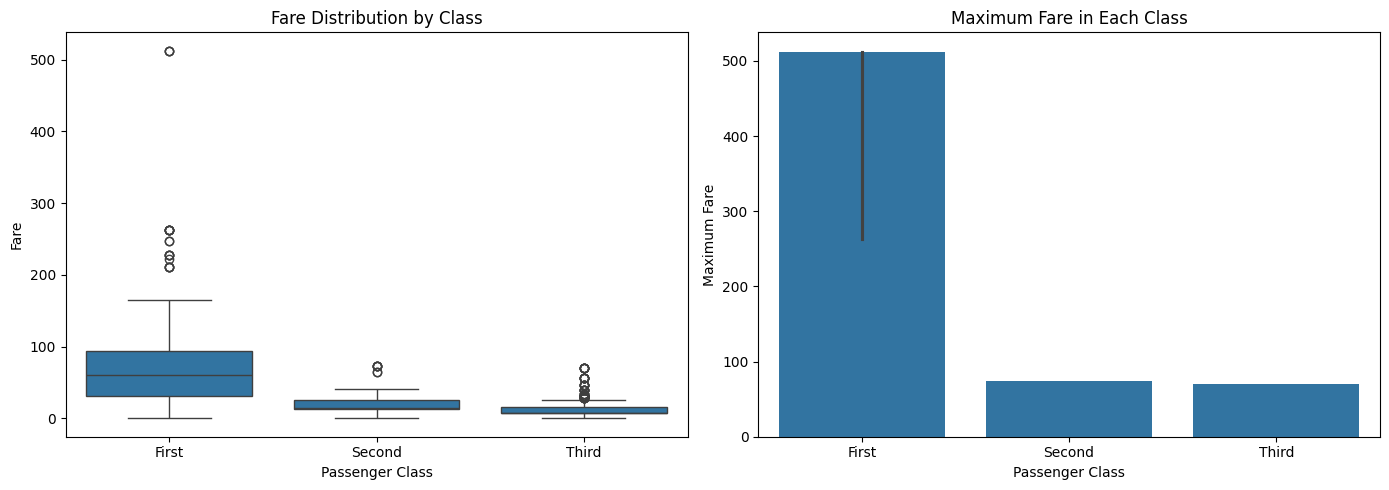

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Boxplot — Fare Distribution by Class
sns.boxplot(data=df, x='class', y='fare', ax=axes[0])
axes[0].set_title('Fare Distribution by Class')
axes[0].set_xlabel('Passenger Class')
axes[0].set_ylabel('Fare')

# Barplot — Maximum Fare per Class
sns.barplot(data=df, x='class', y='fare', estimator=max, ax=axes[1])
axes[1].set_title('Maximum Fare in Each Class')
axes[1].set_xlabel('Passenger Class')
axes[1].set_ylabel('Maximum Fare')

plt.tight_layout()

---
## Fare Analysis by Passenger Class

After visualizing the fare distribution across passenger classes using a boxplot and a maximum-fare barplot, several clear patterns appear:

1. First Class  
   The highest fares belong to Class 1 passengers. The maximum fare reaches 512.33, which matches the presence of luxury cabins and multi-passenger bookings. The boxplot also shows a wide spread, indicating a diverse range of ticket prices in this group.

2. Second Class  
   Fares in Class 2 are significantly lower than Class 1. The maximum fare is much smaller, and the distribution is more compact. There are a few mild outliers, but nothing extreme.

3. Third Class  
   Class 3 shows the lowest overall fare range. The typical ticket price is very low, but there are a few high outliers such as the 69.55 fare. Based on IQR, these values are statistical outliers, although they still make sense in context (group tickets or shared accommodations).

### Summary
The visualizations clearly confirm that ticket price strongly correlates with passenger class. Class 1 has the highest average and maximum fares, Class 2 occupies the middle range, and Class 3 has the lowest fares with a few unusual high values.

---

In [ ]:
#fare distribution embark-down 
df.groupby('embark_town')['fare'].max() 

embark_town
Cherbourg      512.3292
Queenstown      90.0000
Southampton    263.0000
Name: fare, dtype: float64

Text(0, 0.5, 'Maximum Fare')

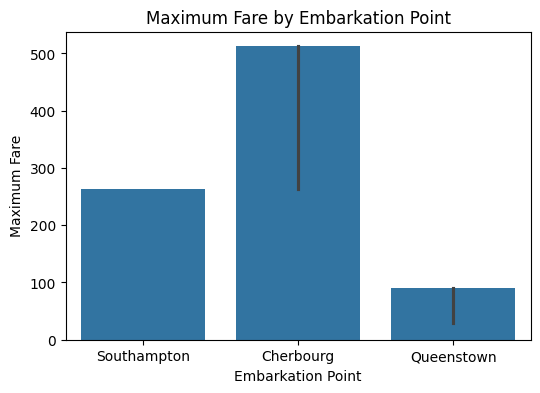

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='embark_town', y='fare', estimator=max)
plt.title('Maximum Fare by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Maximum Fare')

In [ ]:

df[df['class']=='First'].groupby('embark_town')['class'].count() 

embark_town
Cherbourg       85
Queenstown       2
Southampton    129
Name: class, dtype: int64

---
### First Class Passengers and Fare by Embark Town

- The highest number of first class passengers boarded from Southampton.  
- However, passengers who paid the highest fares mostly boarded from Cherbourg.  

This shows that while Southampton had the most first class travelers, Cherbourg had the wealthiest passengers in terms of ticket price.

---

C:\Users\ZRS\AppData\Local\Temp\ipykernel_10164\79257474.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='family_size', y='fare', data=df, palette='pastel', ax=axes[1])


Text(0, 0.5, 'Fare')

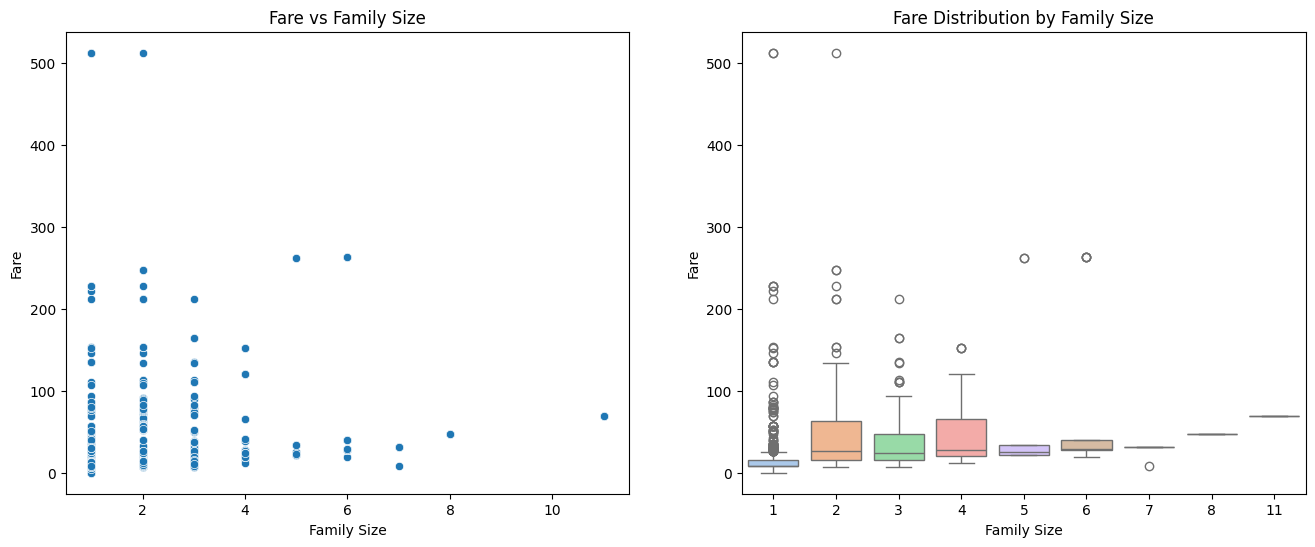

In [ ]:
# Figure subplot
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# 1) Scatter plot
sns.scatterplot(x='family_size', y='fare', data=df, ax=axes[0])
axes[0].set_title('Fare vs Family Size')
axes[0].set_xlabel('Family Size')
axes[0].set_ylabel('Fare')

# 2) Boxplot
sns.boxplot(x='family_size', y='fare', data=df, palette='pastel', ax=axes[1])
axes[1].set_title('Fare Distribution by Family Size')
axes[1].set_xlabel('Family Size')
axes[1].set_ylabel('Fare')

---
### Fare vs Family Size

- We analyzed the relationship between ticket fare (fare) and family size (family_size).  
- In general, passengers with larger families tended to have higher total fares, likely because multiple tickets were purchased for family members.  
- However, some extreme fares (outliers) exist, mostly from first class tickets or exceptionally expensive bookings.  
- To better understand individual costs, we calculated fare per person by dividing fare by family_size.  
- This showed that, on average, the cost per person does not increase significantly with family size, indicating that larger families may have purchased lower-class or discounted tickets.
---

C:\Users\ZRS\AppData\Local\Temp\ipykernel_10164\2389607863.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_group', y='fare', data=df, palette='pastel', ax=axes[0])
C:\Users\ZRS\AppData\Local\Temp\ipykernel_10164\2389607863.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='fare', data=df, estimator='mean', palette='pastel', ax=axes[1])


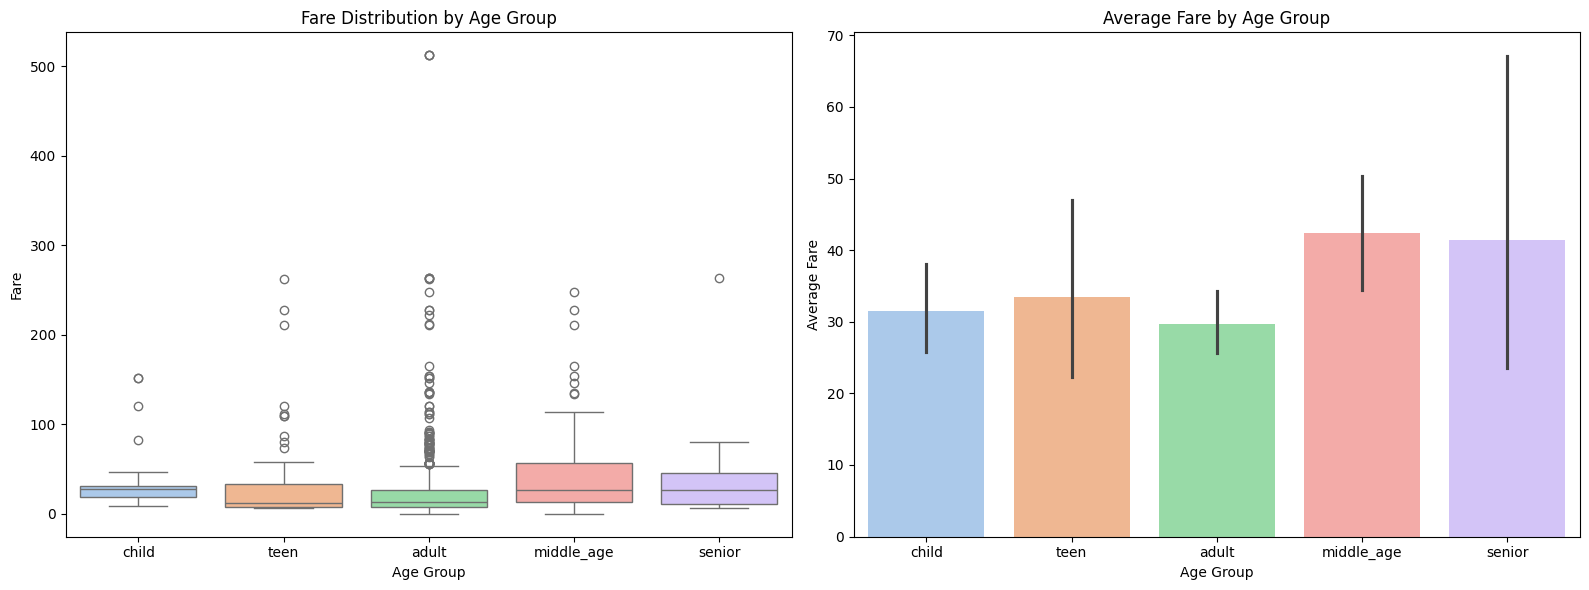

In [ ]:
# age_GRUOP BY FARE 
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# 1) Boxplot 
sns.boxplot(x='age_group', y='fare', data=df, palette='pastel', ax=axes[0])
axes[0].set_title('Fare Distribution by Age Group')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Fare')

# 2) Barplot - 
sns.barplot(x='age_group', y='fare', data=df, estimator='mean', palette='pastel', ax=axes[1])
axes[1].set_title('Average Fare by Age Group')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Average Fare')

plt.tight_layout()

---
### Fare vs Age Group

We analyzed the relationship between ticket fare (fare) and age groups (age_group).

- Boxplot shows the distribution of ticket fares within each age group and highlights outliers (extremely high fares).  
- Barplot shows the average fare per age group, making it easier to compare typical spending.  

Insights:

- Most passengers belong to the Adult (18-40) group.  
- The highest total fares are often within the Adult group due to sheer number of passengers.  
- However, the average fare per passenger is higher in some Middle (40-60) or Senior (60+) age groups, likely due to higher-class tickets.  
- Outliers (very expensive tickets) can significantly influence the mean fare.
---

C:\Users\ZRS\AppData\Local\Temp\ipykernel_10164\1214962415.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='alive', y='fare', data=df, palette='pastel')


Text(0, 0.5, 'Fare')

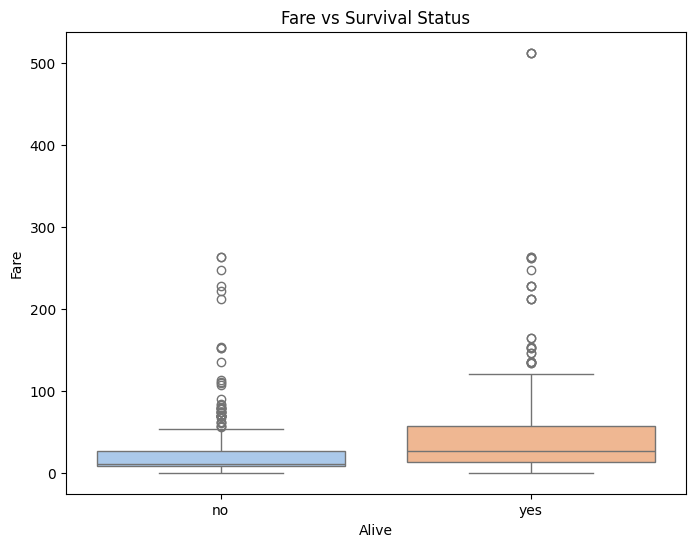

In [ ]:
# fare by alive 
plt.figure(figsize=(8,6))

sns.boxplot(x='alive', y='fare', data=df, palette='pastel')
plt.title('Fare vs Survival Status')
plt.xlabel('Alive')
plt.ylabel('Fare')

---
### Fare vs Survival Status

We analyzed the relationship between ticket fare (fare) and survival status (alive).

- The boxplot shows the distribution of fares for passengers who survived versus those who did not.  
- Passengers who survived generally paid higher fares, while passengers who did not survive had lower fares on average.  
- Outliers (extremely expensive tickets) are visible, mostly representing first-class passengers or large family bookings.  
- This visualization indicates a correlation between higher ticket fare and survival, likely reflect.
---

C:\Users\ZRS\AppData\Local\Temp\ipykernel_10164\3617200821.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='fare', data=df, palette='pastel', ax=axes[0,0])
C:\Users\ZRS\AppData\Local\Temp\ipykernel_10164\3617200821.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='fare', data=df, palette='pastel', ax=axes[0,1])
C:\Users\ZRS\AppData\Local\Temp\ipykernel_10164\3617200821.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='family_size', y='fare', data=df, palette='pastel', ax=axes[1,0])
C:\Users\ZRS\AppData\Lo

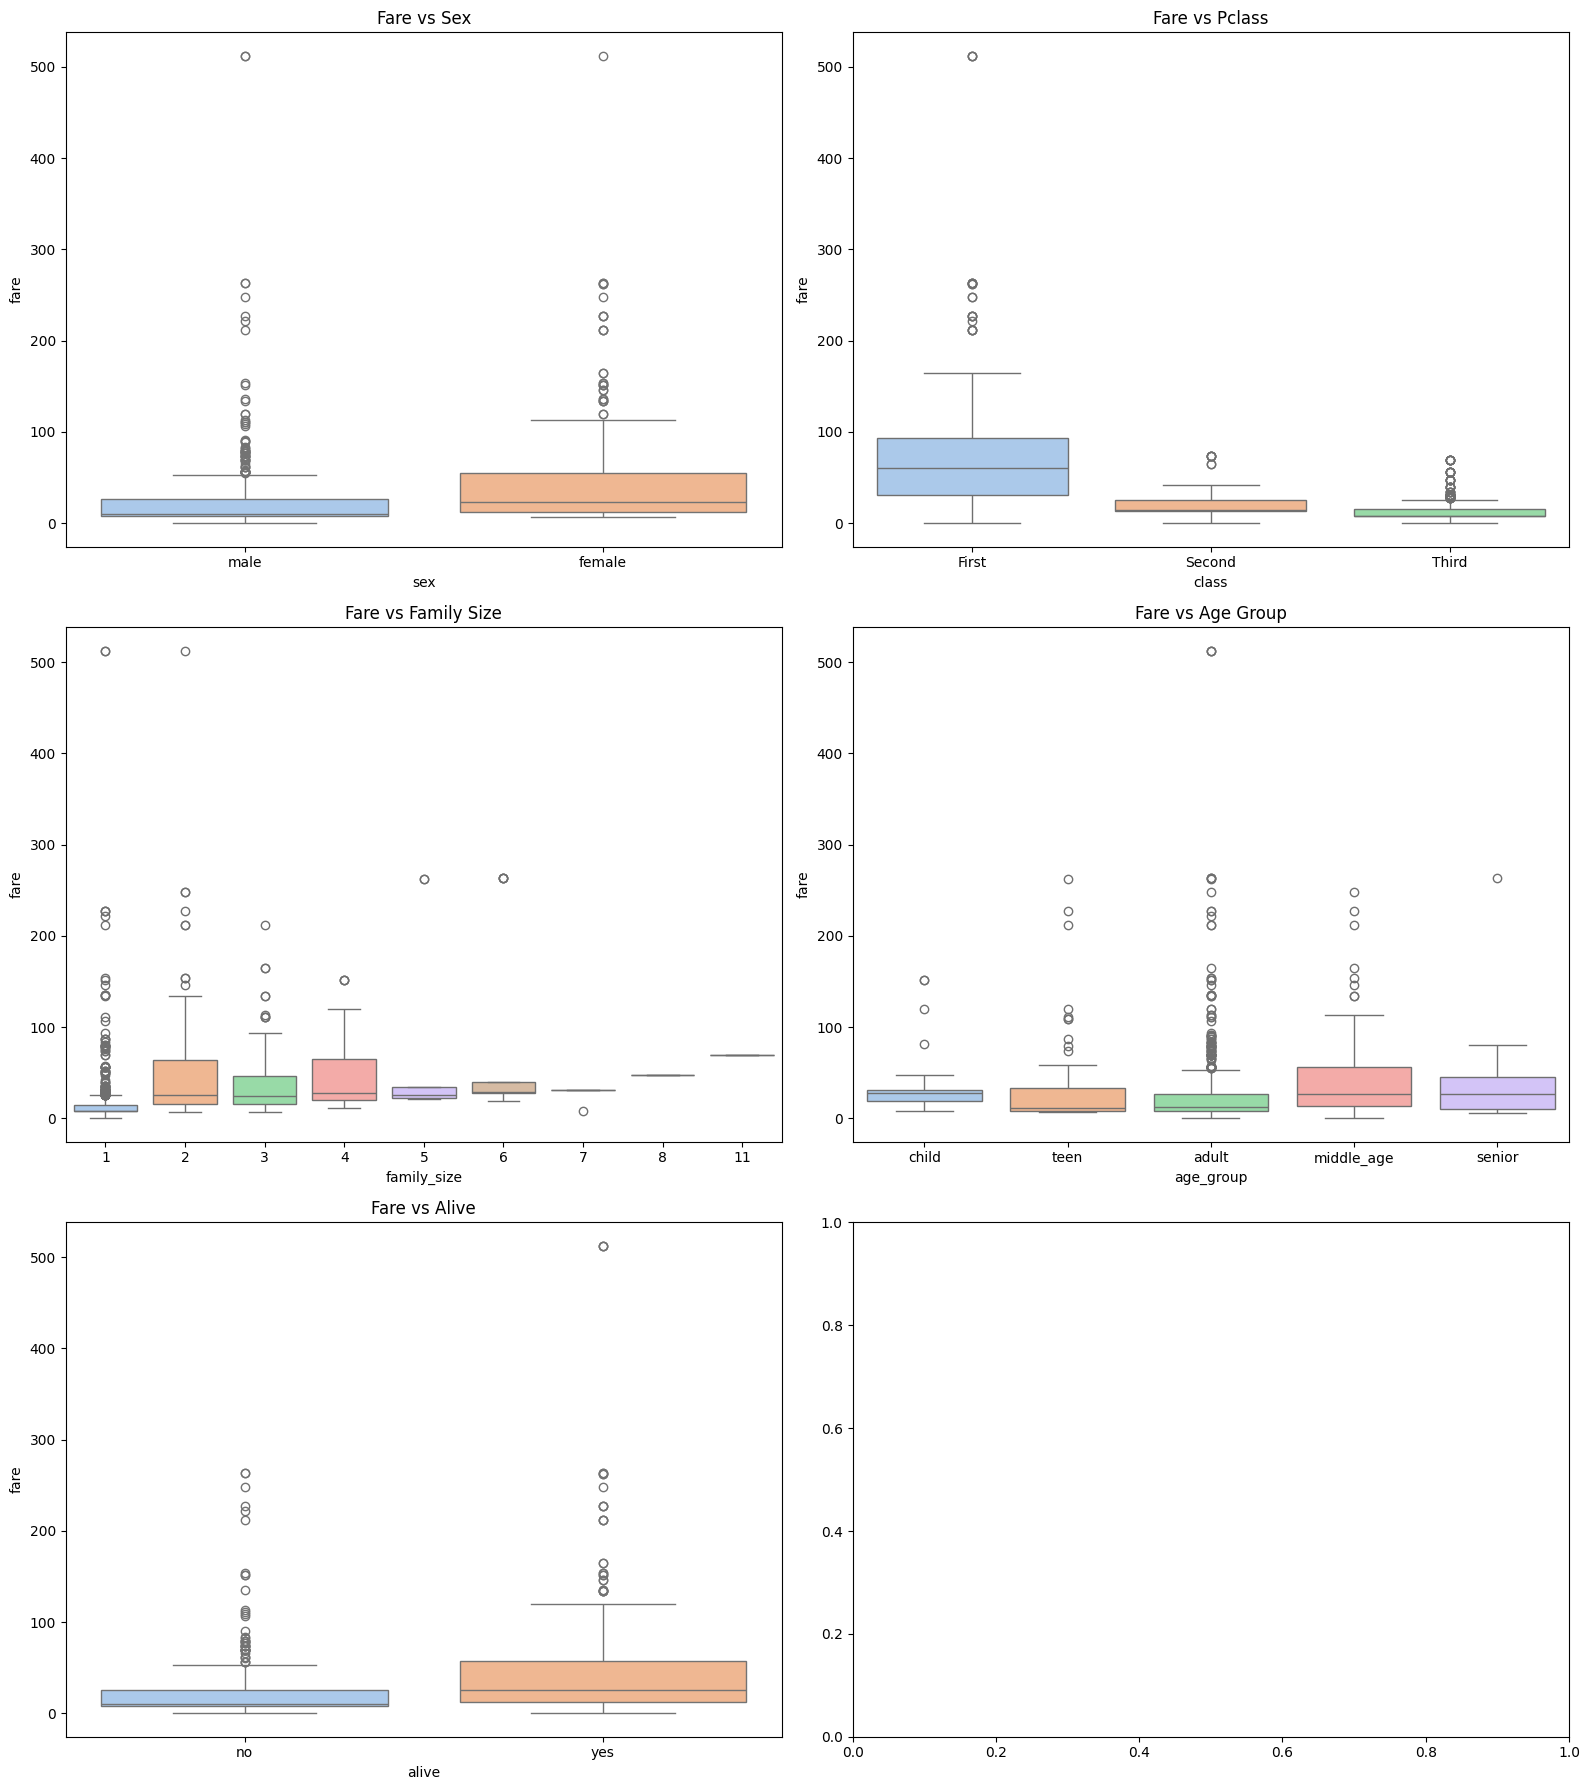

In [ ]:
#  figure
fig, axes = plt.subplots(3, 2, figsize=(16,18))

# 1) Fare vs Sex
sns.boxplot(x='sex', y='fare', data=df, palette='pastel', ax=axes[0,0])
axes[0,0].set_title('Fare vs Sex')

# 2) Fare vs Pclass
sns.boxplot(x='class', y='fare', data=df, palette='pastel', ax=axes[0,1])
axes[0,1].set_title('Fare vs Pclass')

# 3) Fare vs Family Size
sns.boxplot(x='family_size', y='fare', data=df, palette='pastel', ax=axes[1,0])
axes[1,0].set_title('Fare vs Family Size')

# 4) Fare vs Age Group
sns.boxplot(x='age_group', y='fare', data=df, palette='pastel', ax=axes[1,1])
axes[1,1].set_title('Fare vs Age Group')

# 5) Fare vs Alive
sns.boxplot(x='alive', y='fare', data=df, palette='pastel', ax=axes[2,0])
axes[2,0].set_title('Fare vs Alive')
#  layout
plt.tight_layout()

---
#  Analysis Summary: Fare

We analyzed the ticket fare (fare) in relation to different passenger features to uncover patterns and insights.

#### 1. Fare vs Sex
- Females generally paid higher average fares than males, even though males were more numerous in most classes.  
- This suggests that female passengers, especially in first class, tended to book more expensive tickets.

#### 2. Fare vs Pclass
- As expected, first class passengers (Class 1) paid the highest fares, while Class 3 passengers paid the lowest.  
- Outliers exist in all classes, representing extremely expensive tickets, mostly in Class 1.

#### 3. Fare vs Family Size
- Passengers with larger families had higher total fares due to multiple tickets purchased.  
- However, fare per person is relatively stable across family sizes, indicating that larger families may have bought lower-class tickets to balance costs.  

#### 4. Fare vs Age Group
- Adults (18-40) had the highest total fares, mainly due to the large number of passengers.  
- Middle-aged (40-60) and Seniors (60+) had higher average fare per passenger, likely from more first-class tickets.  
- Outliers represent very expensive individual tickets.

#### 5. Fare vs Alive
- Passengers who survived generally paid higher fares, while those who did not survive had lower fares.  
- Outliers indicate first-class passengers or large families with very expensive tickets.  
- This suggests a correlation between higher fare and survival probability.

#### 6. Fare vs Embark Town
- Southampton had the most first-class passengers, while Cherbourg passengers tended to pay the highest fares.  
- This shows that although Southampton had more passengers, Cherbourg had the wealthiest in terms of ticket price.

---

Overall Insights:
- Class and fare are strongly correlated: higher class → higher fare.  
- Family size affects total fare but not much the fare per person.  
- Age and fare show that adults dominate total fares, but older passengers spend more per person.  
- Survival is related to fare: higher fares → higher survival probability.  
- Boarding town affects fare: certain towns had wealthier passengers regardless of passenger count.
---

In [ ]:
#class disttrbution 
pd.crosstab(df['class'],df['embark_town'])

embark_town,Cherbourg,Queenstown,Southampton
class,,,
First,85,2,129
Second,17,3,164
Third,66,72,353


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   sex          891 non-null    object  
 1   age          891 non-null    float64 
 2   sibsp        891 non-null    int64   
 3   parch        891 non-null    int64   
 4   fare         891 non-null    float64 
 5   class        891 non-null    category
 6   who          891 non-null    object  
 7   embark_town  891 non-null    object  
 8   alive        891 non-null    object  
 9   alone        891 non-null    bool    
 10  family_size  891 non-null    int64   
 11  age_group    891 non-null    category
dtypes: bool(1), category(2), float64(2), int64(3), object(4)
memory usage: 65.7+ KB


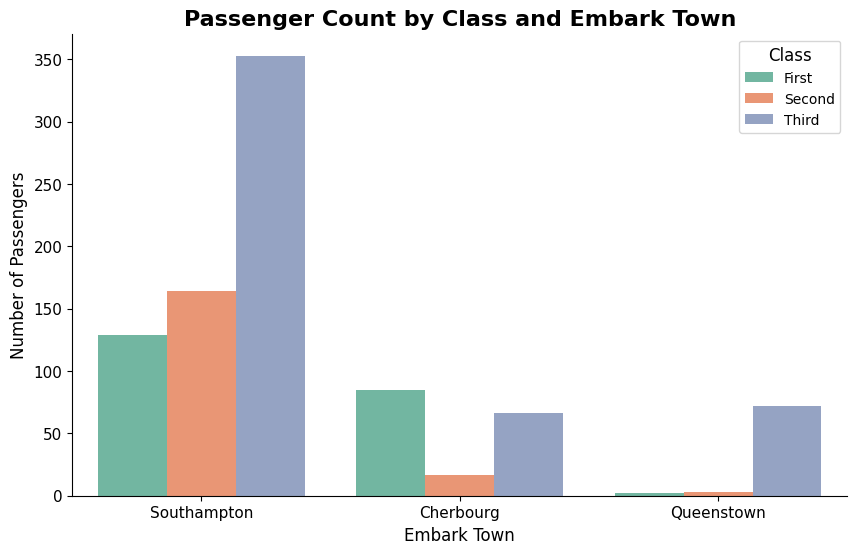

In [ ]:
plt.figure(figsize=(10,6))

# Countplot: x = Embark Town, hue = Pclass
sns.countplot(x='embark_town', hue='class', data=df, palette='Set2')

# Customization
plt.title('Passenger Count by Class and Embark Town', fontsize=16, fontweight='bold')
plt.xlabel('Embark Town', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.legend(title='Class', title_fontsize=12, fontsize=10)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
sns.despine() 

---
### Passenger Class Distribution by Embark Town

- This plot shows the number of passengers in each class (pclass) boarding from each embark town (embarked_town).  
- Southampton had the most passengers overall, with a high number in Class 3.  
- Cherbourg had a higher proportion of first-class passengers compared to other towns.  
- Queenstown had the fewest passengers, mostly in Class 3.  

Insights:
- The distribution clearly shows that boarding town affects class composition.  
- Visualizing count this way highlights differences in passenger demographics between towns.
---

In [ ]:
pd.crosstab(df['class'],df['alive'])

alive,no,yes
class,,
First,80,136
Second,97,87
Third,372,119


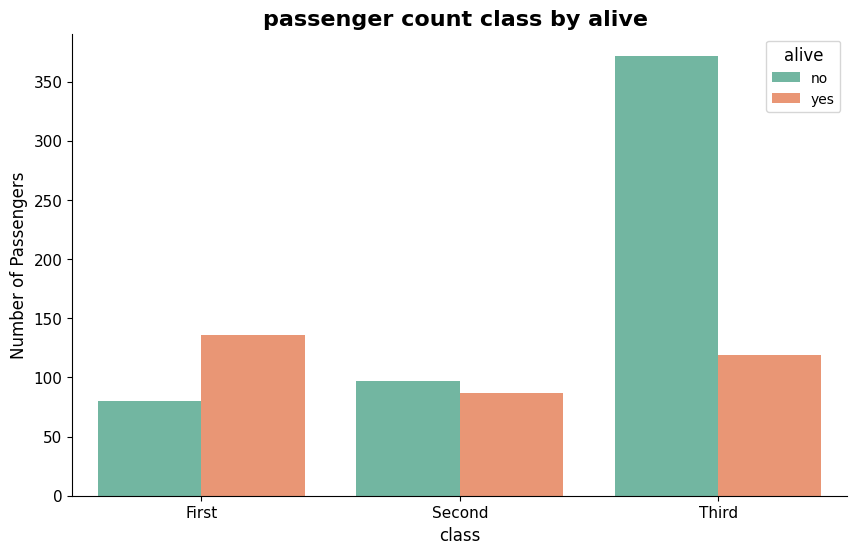

In [ ]:
plt.figure(figsize=(10,6))
#countplot : x= class , hue =alive 
sns.countplot(data=df,x='class',hue='alive',palette='Set2')
#customization 
plt.title('passenger count class by alive ',fontsize=16, fontweight='bold')
plt.xlabel('class', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.legend(title='alive', title_fontsize=12, fontsize=10)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
sns.despine()

---
### Survival Distribution by Passenger Class

We analyzed the relationship between **passenger class (class)** and **survival status (aliveFirst Class (Class 1):ss 1):** The majority of passengers survived, indicating higher survival probability for wealthier or higher-class passengeSecond Class (Class 2):ss 2):** Survival was moderate; a balanced number of passengers survived and did not surviThird Class (Class 3):ss 3):** Most passengers did not survive, highlighting the lower survival rate for lower-class passeInsights:ights:**
- Survival probability is strongly correlated with passengerhigher class → higher survival ratel rate**.  
- This pattern reflects the historical reality of lifeboat access and prioritization on the Titanic.  
- Visualizatiocountplots or stacked bar plots plots** can clearly demonstrate this distribution across classes.
---

In [ ]:
#class by alone 
pd.crosstab(df['class'],df['alone'])

alone,False,True
class,,
First,107,109
Second,80,104
Third,167,324


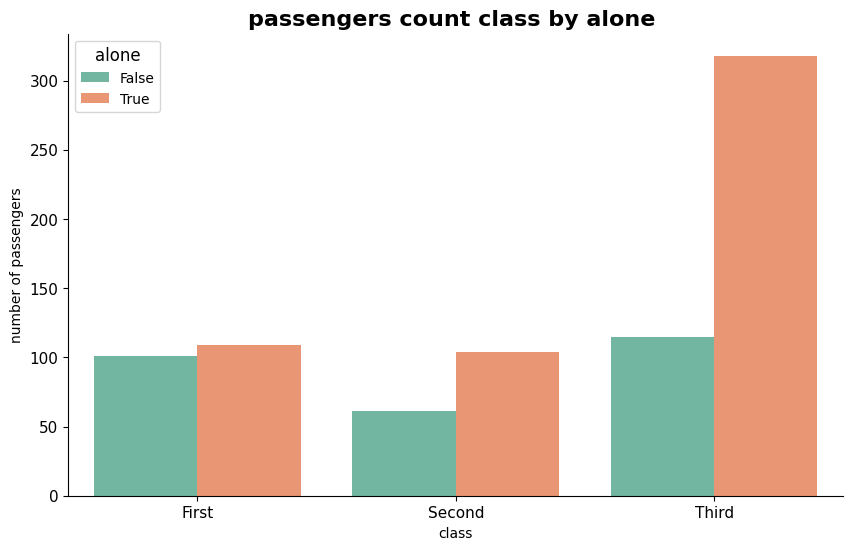

In [ ]:
plt.figure(figsize=(10,6))
#countplot 
sns.countplot(x='class',hue='alone',data=df,palette='Set2')
#custumazition 
plt.title('passengers count class by alone ',fontsize=16, fontweight='bold')
plt.xlabel('class')
plt.ylabel('number of passengers')
plt.legend(title='alone', title_fontsize=12, fontsize=10)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
sns.despine()


---
### Passenger Class Distribution by Travel Alone Status

We analyzed the relationship between **passenger class (class)** and whether a passenger was **traveling alone (aloneThird Class (Class 3):ss 3):** The highest number of passengers traveling alone were in ClassSecond Class (Class 2):ss 2):** Moderate number of passengers were traveling aloFirst Class (Class 1):ss 1):** The fewest passengers traveled alone; most were accompanied by family or compaInsights:ights:**
- Traveling alone is more common among lower-class passengers.  
- Class 3 passengers had the largest proportion of individuals without family.  
- This pattern may reflect economic and social factors of Titanic passengers: lower-class passengers were more likely to travel solo, while higher-class passengers often traveled with family or companions.
---

In [ ]:
#class by age group 
pd.crosstab(df['class'],df['age_group'])

age_group,teen,adult,middle_age,senior
class,,,,
First,10,124,62,14
Second,10,121,31,3
Third,36,357,35,5


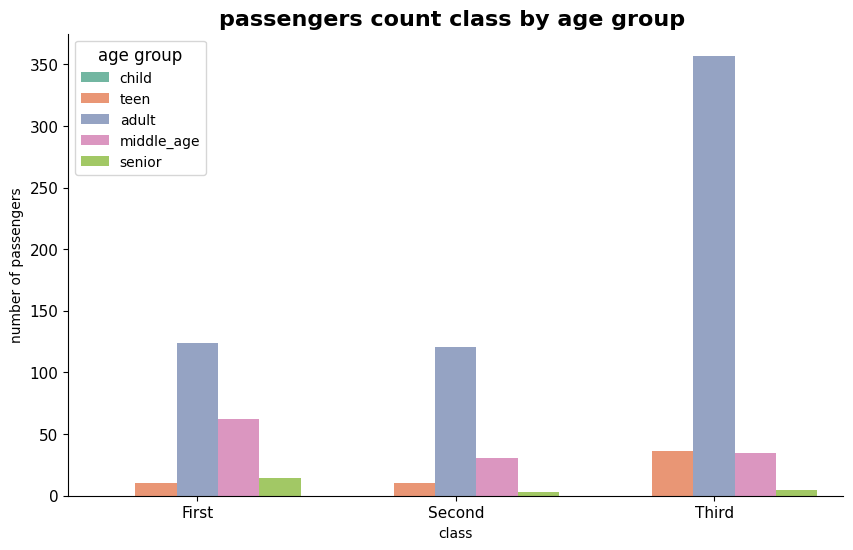

In [ ]:
plt.figure(figsize=(10,6))
#countplot
sns.countplot(x='class',hue='age_group',data=df,palette='Set2')
#costumazition 
plt.title('passengers count class by age group ',fontsize=16, fontweight='bold')
plt.xlabel('class')
plt.ylabel('number of passengers')
plt.legend(title='age group', title_fontsize=12, fontsize=10)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
sns.despine()


---
# passengers class Distribution by age group 
We analyzed the relationship between **passenger class (class)** and **age groups (age_groupFirst Class (Class 1):ss 1):** Most passengeAdults (18-40)18-40)**, with some Middle-aged (40-60) and very few SenioSecond Class (Class 2):ss 2):**AdultsAdults**, followed by Middle-aged passengeThird Class (Class 3):ss 3):** Contains a higher proporChildren/Teens (under 18)er 18)** alongside many AduInsights:ights:**
- Adults dominate all classes in terms of sheer numbers.  
- Children and teens are more prevalent in Class 3, reflecting family travel patterns and socio-economic factors.  
- Higher classes tend to have older passengers (Middle-aged and Adults) who could afford higher fares.  
- This distribution highlighage and class dynamicsnamics** on the Titanic and can be visualized effectively using countplots or stacked bar plots.
---

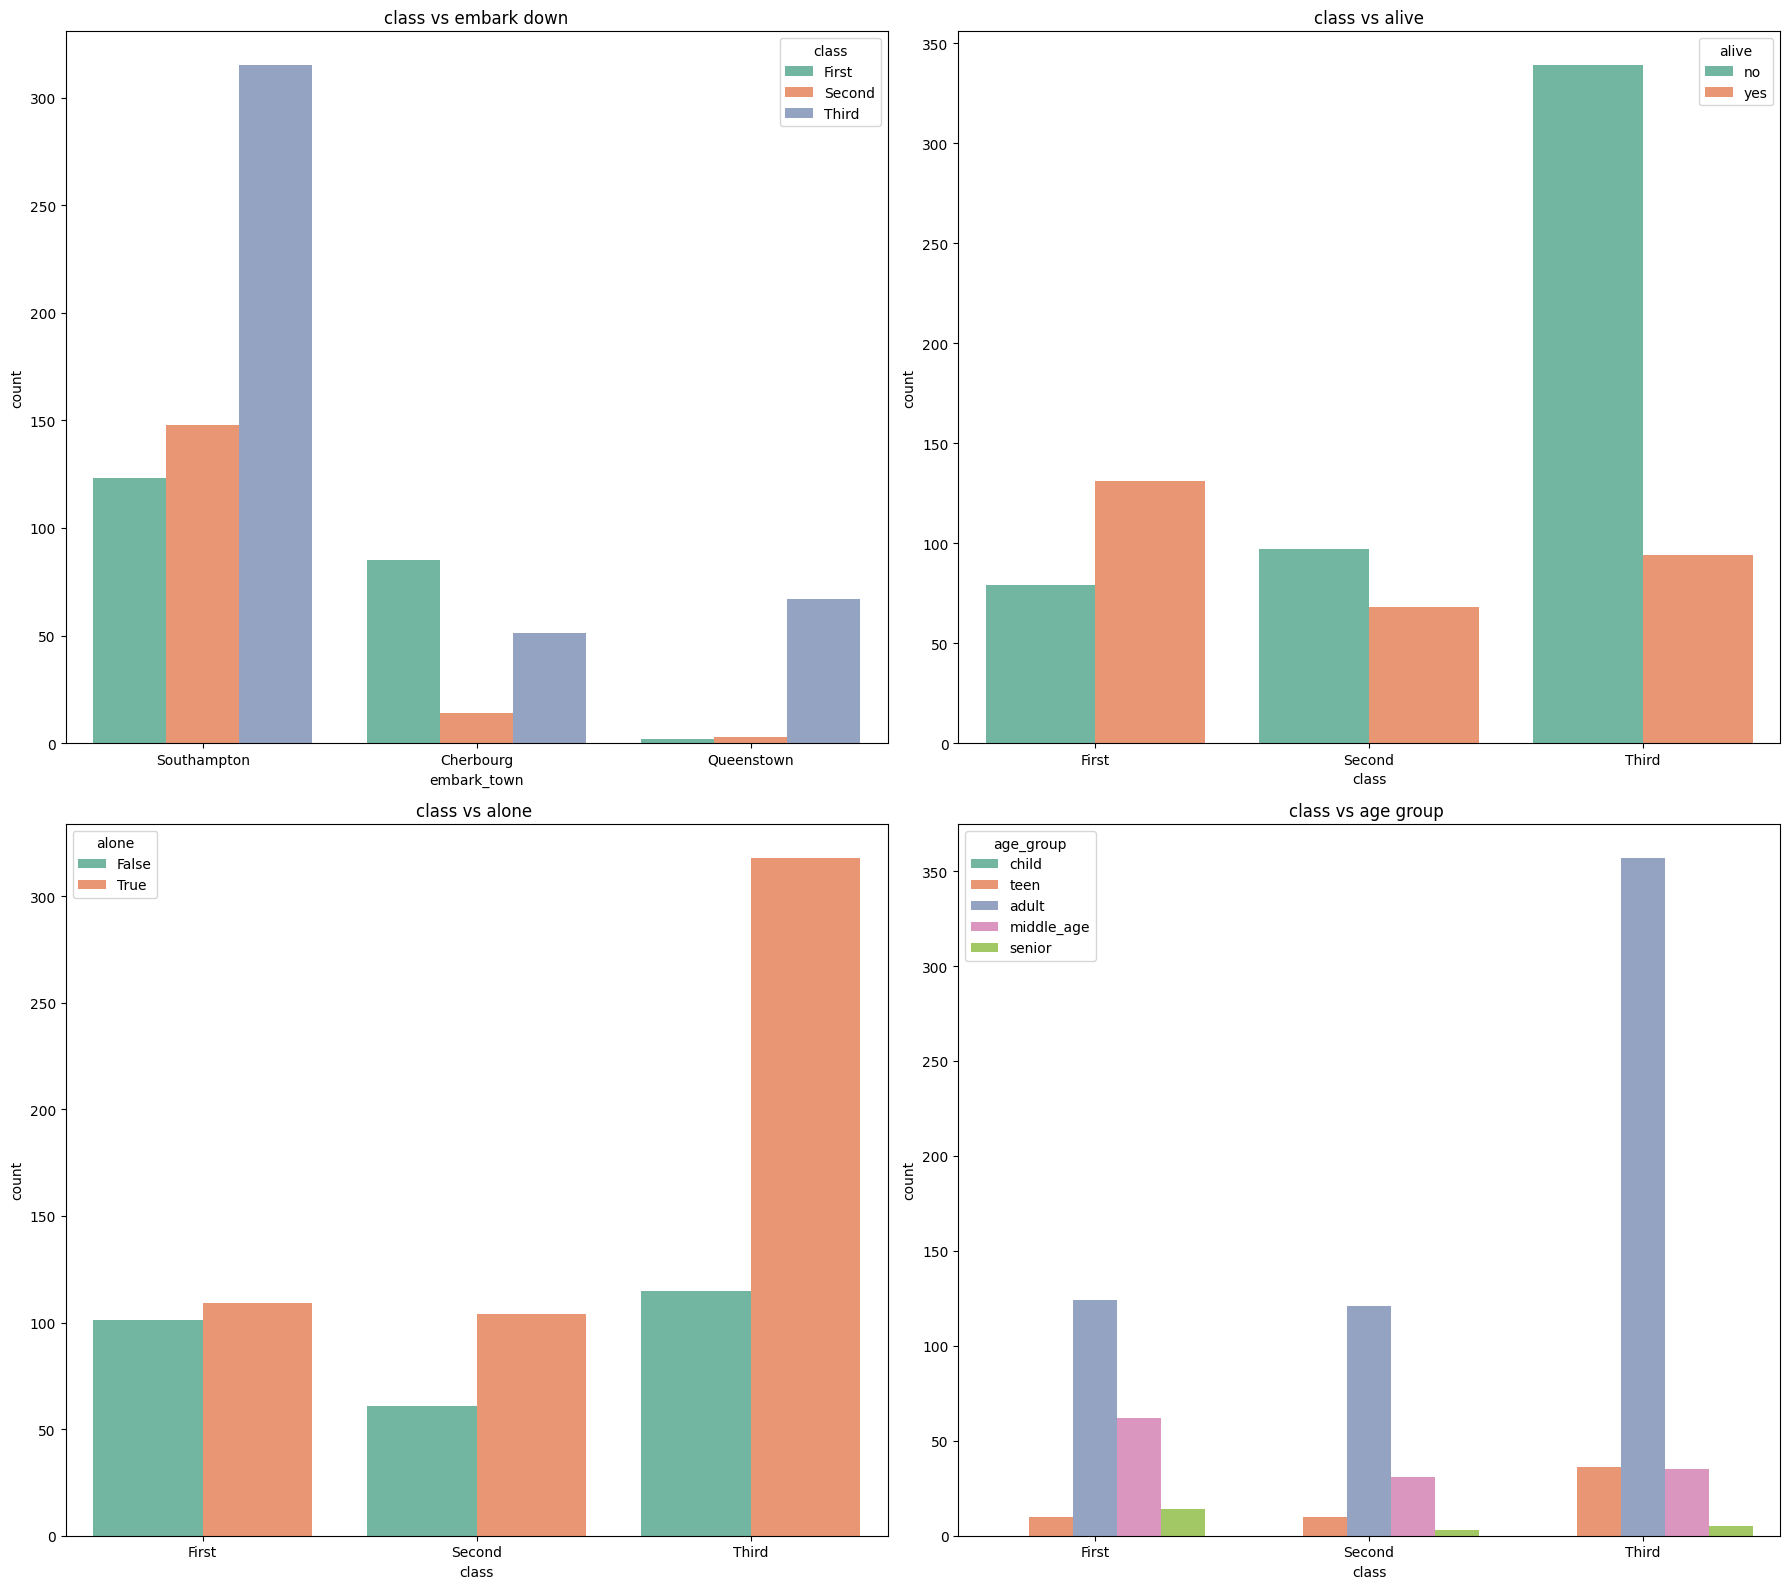

In [ ]:
fig,axes=plt.subplots(2,2,figsize=(18,16))
#class by embark_town 
# Countplot: x = Embark Town, hue = Pclass
sns.countplot(x='embark_town', hue='class', data=df, palette='Set2',ax=axes[0,0])
axes[0,0].set_title('class vs embark down')
#countplot : x= class , hue =alive 
sns.countplot(data=df,x='class',hue='alive',palette='Set2',ax=axes[0,1])
axes[0,1].set_title('class vs alive')
#countplot : x=class , hue=alone
sns.countplot(x='class',hue='alone',data=df,palette='Set2',ax=axes[1,0])
axes[1,0].set_title('class vs alone ')
##countplot : x=class , hue=age group
sns.countplot(x='class',hue='age_group',data=df,palette='Set2',ax=axes[1,1])
axes[1,1].set_title('class vs age group ')
plt.tight_layout()


---
#  Summary Analysis: Passenger Class

We analyzed **passenger class (plass)** in relation to various features to uncover patterns on the Titanic.

#### 1. Class vs Embark TowSouthamptonon** had the most passengers overall, especiallyClass 3 3**. Cherbourgrg** had a higher proportionfirst-class passengersrs** despite fewer total passengers. Queenstownwn** had the fewest passengers, mostly in Class 3. Insight:t:** Boarding town strongly affects class composition.

#### 2. Class vs AlivFirst Class:s:** Majority survived. Second Class:s:** Balanced survival and mortality. Third Class:s:** Most passengers did not survive. Insight:t:** Higher class correlates with higher survival probability.

#### 3. Class vs AlonThird Class:s:** Highest number of passengers traveling alone. Second Class:s:** Moderate number traveling alone. First Class:s:** Fewest passengers traveled alone; most had family or companions. Insight:t:** Traveling alone is more common in lower-class passengers.

#### 4. Class vs Age GrouFirst Class:s:** Mostly Adults (18-40) with some Middle-aged (40-60) and few Seniors. Second Class:s:** Mostly Adults, followed by Middle-aged. Third Class:s:** Higher proportion of Children/Teens (under 18) alongside many Adults. Insight:t:** Children are concentrated in Class 3, while higher classes have older passengers, reflecting economic and family travel patterns.

-Overall Insights:s:*Class composition varies by boarding town, age, and traveling alone status.s.** Survival is strongly correlated with class:s:** higher class → higher survival. Lower-class passengers (Class 3) are more likely to travel alone and include more children/teens.s.**  
- These patterns highlight the social and economic dynamics aboard the Titanic and can be effectively visualized wcountplots, stacked bar plots, and survival distribution chartsts**.
---

In [ ]:
df

,sex,age,sibsp,parch,fare,class,embark_town,alive,alone,family_size,age_group
0,male,22.0,1.0,0.0,7.2500,Third,Southampton,no,False,2.0,adult
1,female,38.0,1.0,0.0,71.2833,First,Cherbourg,yes,False,2.0,adult
2,female,26.0,0.0,0.0,7.9250,Third,Southampton,yes,True,1.0,adult
3,female,35.0,1.0,0.0,53.1000,First,Southampton,yes,False,2.0,adult
4,male,35.0,0.0,0.0,8.0500,Third,Southampton,no,True,1.0,adult
...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0.0,0.0,13.0000,Second,Southampton,no,True,1.0,adult
887,female,19.0,0.0,0.0,30.0000,First,Southampton,yes,True,1.0,adult
888,female,28.0,1.0,2.0,23.4500,Third,Southampton,no,False,4.0,adult
889,male,26.0,0.0,0.0,30.0000,First,Cherbourg,yes,True,1.0,adult


In [ ]:
pd.crosstab(df['embark_town'],df['alive'])

alive,no,yes
embark_town,,
Cherbourg,71,79
Queenstown,43,29
Southampton,401,185


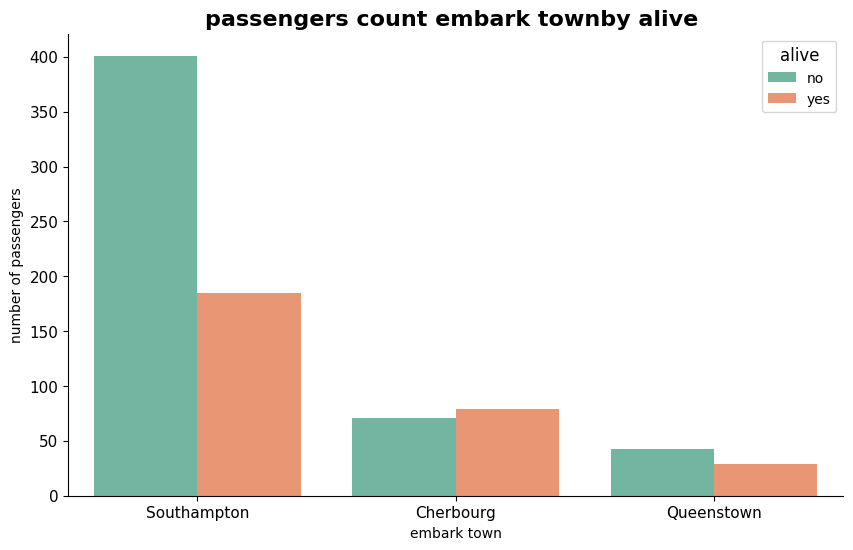

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='embark_town',hue='alive',palette='Set2')
plt.title('passengers count embark townby alive ',fontsize=16, fontweight='bold')
plt.xlabel('embark town')
plt.ylabel('number of passengers')
plt.legend(title='alive', title_fontsize=12, fontsize=10)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
sns.despine()


---
### Embarkation Town × Survival

The relationship between Embarkation Town and Survival reveals clear differences among the three ports.

Passengers who boarded at Cherbourg show the highest survival rate. This is largely explained by the passenger composition of this port: Cherbourg had a higher proportion of first–class travelers and individuals who paid higher fares — groups that, according to previous analyses, had better chances of survival.

In Southampton, although the number of passengers is the highest overall, the survival rate is lower. A significant portion of Southampton passengers traveled in third class, which aligns with the lower survival trends observed earlier.

Queenstown has the smallest passenger count,

---


In [ ]:
pd.crosstab(df['embark_town'],df['age_group'])

age_group,teen,adult,middle_age,senior
embark_town,,,,
Cherbourg,10,109,28,3
Queenstown,3,64,3,2
Southampton,43,429,97,17


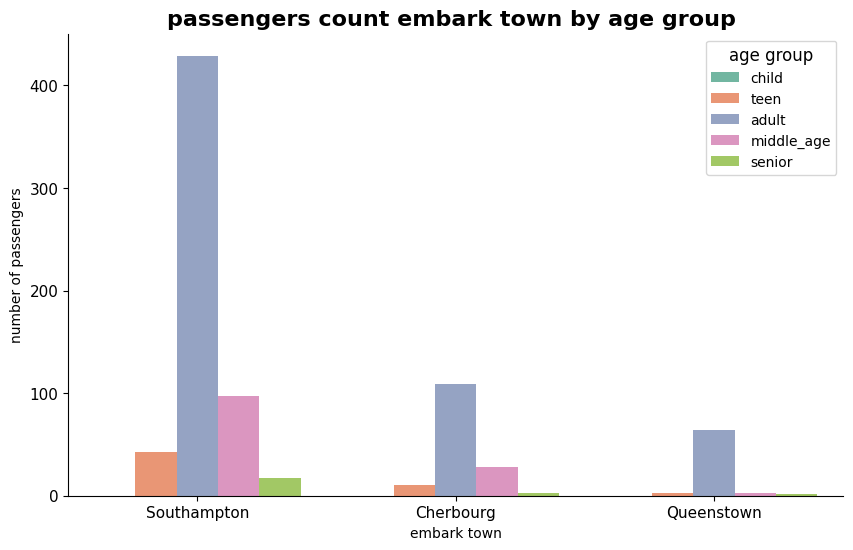

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='embark_town',hue='age_group',data=df,palette='Set2')
plt.title('passengers count embark town by age group ',fontsize=16, fontweight='bold')
plt.xlabel('embark town')
plt.ylabel('number of passengers')
plt.legend(title='age group', title_fontsize=12, fontsize=10)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
sns.despine()

---
### Embarkation Town × Age Group

Analyzing the relationship between Embarkation Town and Age Group reveals how the passenger demographics varied across the three ports.

Passengers from Southampton dominate nearly every age group simply because this port had the largest number of total passengers on the Titanic. Most children, adults, and middle-aged passengers boarded here, showing that Southampton was the primary departure point for a wide range of travelers.

In Cherbourg, the distribution leans more toward adults and middle-aged passengers, with relatively fewer children and seniors. This pattern aligns with Cherbourg’s higher concentration of first-class passengers, who generally tended to be older and more financially stable.

Queenstown has the smallest population overall, and its age distribution is more limited. Most passengers from this port fall into the Adult and Middle-Age groups, with very few children or seniors. This suggests that Queenstown served mostly lower-income emigrants in working-age categories.

Overall, the age-group distribution across ports mirrors the socioeconomic patterns observed earlier:  
Southampton hosted a broad and diverse population, Cherbourg had fewer but wealthier and older passengers, and Queenstown served the smallest and most economically constrained group.

---

In [ ]:
pd.crosstab(df['embark_town'],df['alone'])

alone,False,True
embark_town,,
Cherbourg,68,82
Queenstown,16,56
Southampton,193,393


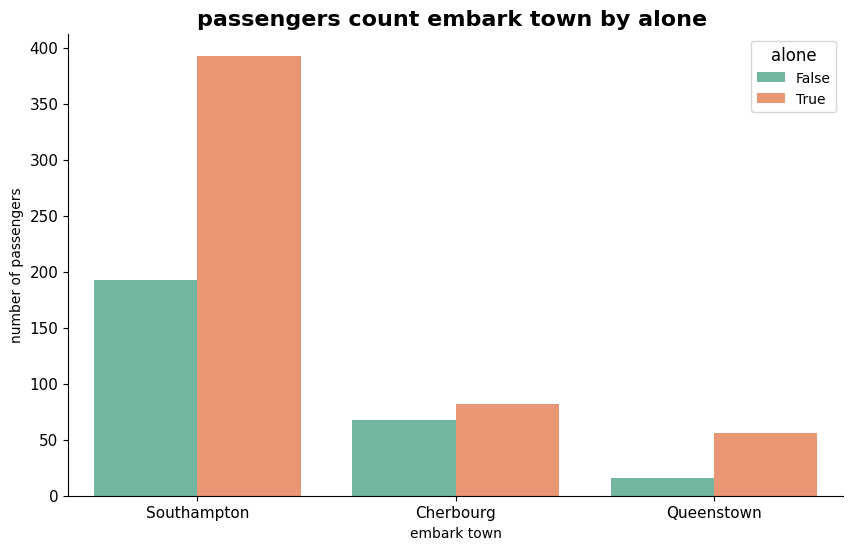

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='embark_town',hue='alone',data=df,palette='Set2')
plt.title('passengers count embark town by alone ',fontsize=16, fontweight='bold')
plt.xlabel('embark town')
plt.ylabel('number of passengers')
plt.legend(title='alone', title_fontsize=12, fontsize=10)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
sns.despine()

---
## Embarkation Town × Alone Status

Comparing Embarkation Town with the Alone feature helps us understand whether passengers tended to travel solo or with family depending on where they boarded.

Across all three ports, the number of passengers traveling alone is higher than those traveling with family. This is especially noticeable in Southampton, which had the largest total passenger count. A significant majority of Southampton passengers boarded alone, reflecting the port’s role as a major departure point for migrants, workers, and solo travelers heading to America.

In Cherbourg, both groups (alone vs. with family) appear in smaller numbers, but the proportion of solo travelers is still slightly higher. Since Cherbourg had a higher concentration of first-class passengers, this suggests that even wealthier individuals were more likely to travel independently rather than with large families.

Queenstown shows the smallest numbers overall, but once again, solo travelers outnumber those with family. This aligns with historical patterns of Queenstown serving working-class emigrants who often traveled alone in search of new opportunities.

Overall, the Alone status is consistently more common in all embarkation ports, but Southampton stands out with the largest gap between solo and family-traveling passengers. This indicates different social and economic motivations for passengers depending on their port of departure.

---

In [ ]:
pd.crosstab(df['embark_town'],df['family_size'])

family_size,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,11.0
embark_town,,,,,,,,,
Cherbourg,82,44,19,3,2,0,0,0,0
Queenstown,56,9,6,0,0,1,0,0,0
Southampton,393,95,53,14,9,9,4,2,7


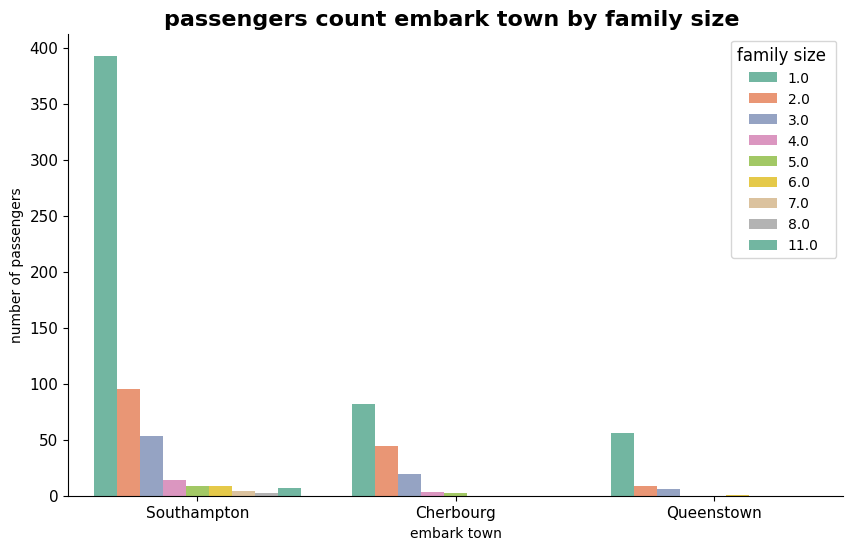

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='embark_town',hue='family_size',data=df,palette='Set2')
plt.title('passengers count embark town by family size ',fontsize=16, fontweight='bold')
plt.xlabel('embark town')
plt.ylabel('number of passengers')
plt.legend(title='family size ', title_fontsize=12, fontsize=10)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
sns.despine()

---
# Embarkation Town × Family Size

Analyzing the relationship between Embarkation Town and Family Size helps us understand how passenger groups differed depending on where they boarded the Titanic.

Passengers departing from Southampton had the largest number of bigger families. Since Southampton had the highest total number of passengers, it naturally included more family groups, especially among third-class travelers who often moved together as larger households seeking a new life abroad.

In Cherbourg, most passengers appear with small family sizes, and many traveled completely alone. Cherbourg is known historically for having a higher share of first-class passengers, who tended to travel either solo or in very small family units. Large family groups were uncommon from this port.

Queenstown (the port with the fewest passengers) also shows mostly small families, with the majority traveling alone or in pairs. This matches the demographic of Queenstown passengers—mostly emigrants and workers with limited financial means, often traveling without extended family.

Overall, the data shows:
- Southampton → most large families
- Cherbourg → mostly small families, many solo travelers
- Queenstown → small families and solo passengers dominate

This distribution reflects the social and economic background of each embarkation port and how it influenced the family structures among passengers boarding the Titanic.

---

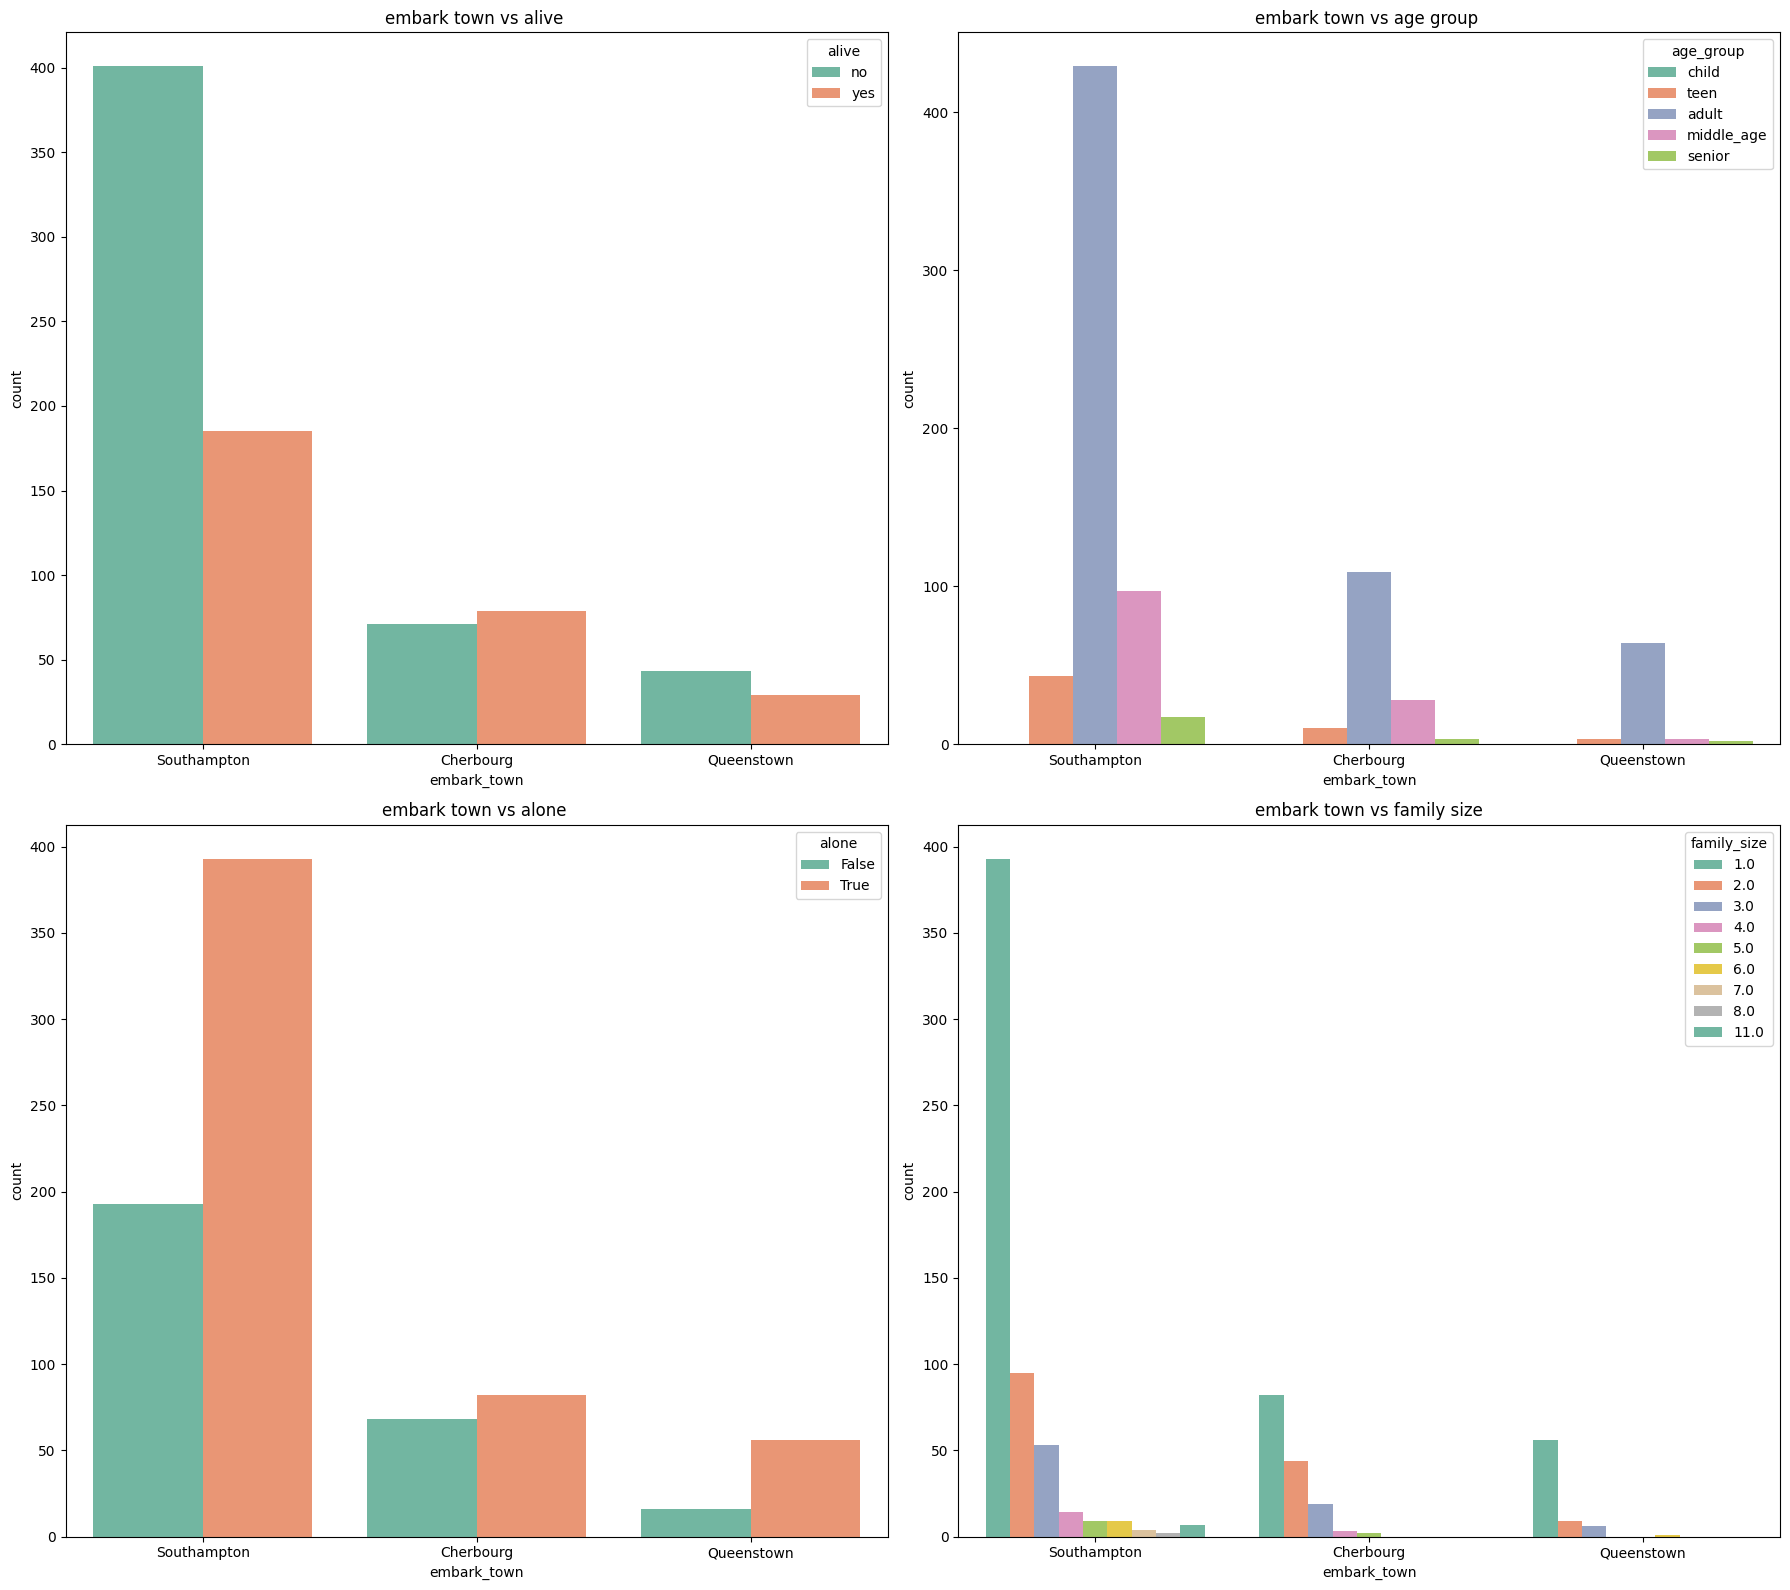

In [ ]:
fig,axes=plt.subplots(2,2,figsize=(18,16))
sns.countplot(data=df,x='embark_town',hue='alive',palette='Set2',ax=axes[0,0])
axes[0,0].set_title('embark town vs alive ')
sns.countplot(x='embark_town',hue='age_group',data=df,palette='Set2',ax=axes[0,1])
axes[0,1].set_title('embark town vs age group ')
sns.countplot(x='embark_town',hue='alone',data=df,palette='Set2',ax=axes[1,0])
axes[1,0].set_title('embark town vs alone ')
sns.countplot(x='embark_town',hue='family_size',data=df,palette='Set2',ax=axes[1,1])
axes[1,1].set_title('embark town vs family size')
plt.tight_layout()

---
## Overall Summary of Embarkation Town (Cherbourg, Queenstown, Southampton)

After analyzing all relationships involving Embarkation Town—including *survival status*, *age groups*, *traveling alone*, and *family size*—a clear picture of how each port shaped passenger characteristics emerges.

### 1. Survival Patterns
Passengers from Cherbourg show noticeably higher survival rates. This is strongly connected to the fact that Cherbourg had the highest proportion of first-class passengers, who had better access to lifeboats and safer locations on the ship.  
In contrast, Southampton passengers faced the lowest survival rates, largely because the majority of them were third-class travelers located deeper inside the ship.

### 2. Age Group Distribution
Southampton had the largest share of passengers across all age groups, simply because it was the main departure port. It included many adults and middle-aged travelers, matching the economic profile of emigrants and workers.  
Cherbourg showed a higher share of adults from wealthier backgrounds, while Queenstown passengers were mostly young adults and middle-aged individuals with far fewer children or elderly passengers.

### 3. Traveling Alone vs. With Family
Passengers boarding at Southampton included the highest number of large families, especially among third-class travelers heading to America together.  
In contrast:
- Cherbourg passengers were more likely to travel alone or in small groups, reflecting wealthier solo travelers and couples.
- Queenstown passengers also traveled mostly alone or in small family units, consistent with its emigrant profile.

### 4. Family Size Patterns
Family sizes differed significantly across ports:
- Southampton → largest families, often 4–6 members or more.
- Cherbourg → mostly solo travelers or very small families (1–2 people).
- Queenstown → small families, with very few large groups.

### Final Insight
Each embarkation town represents a unique social and economic snapshot of Titanic passengers:
- Southampton was the port of the masses—large families, working-class travelers, and the highest passenger count.
- Cherbourg was the port of wealth—fewer passengers, more first-class tickets, higher fares, and higher survival.
- Queenstown was the port of emigrants—mostly young solo travelers or small families, limited financial resources, and lower fare ranges.

These patterns help explain the broader dynamics of survival outcomes, socioeconomic status, and family structures aboard the Titanic

---

In [ ]:
# alone by age group 
pd.crosstab(df['age_group'],df['alone'])

alone,False,True
age_group,,
teen,26,30
adult,190,412
middle_age,57,71
senior,4,18


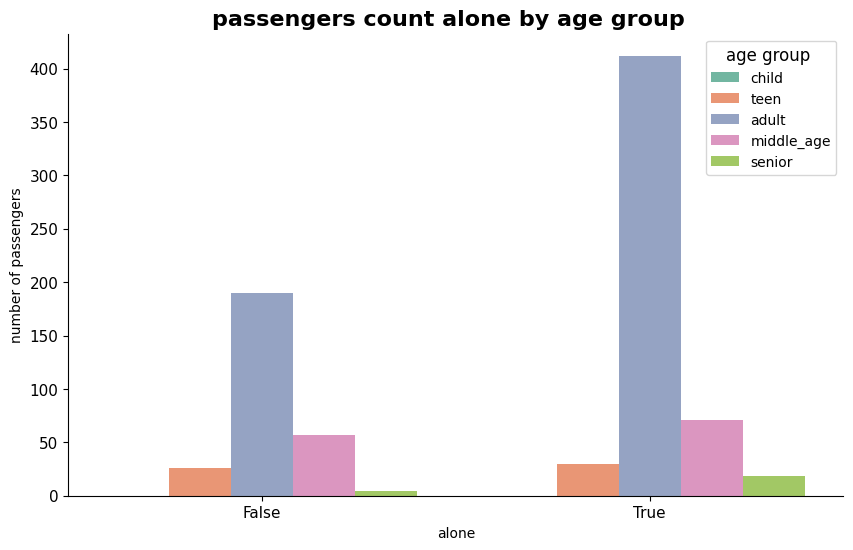

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='alone',hue='age_group',palette='Set2')
plt.title('passengers count alone by age group  ',fontsize=16, fontweight='bold')
plt.xlabel('alone')
plt.ylabel('number of passengers')
plt.legend(title='age group ', title_fontsize=12, fontsize=10)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
sns.despine()

---
## Summary of the Relationship Between Traveling Alone and Age Groups

The comparison between Age Groups and Alone status reveals clear demographic patterns in how different age categories traveled on the Titanic.

### 1. Children
Children were rarely traveling alone. Almost all children belonged to family groups, typically accompanied by parents or siblings. This pattern confirms that child passengers were usually part of larger family units rather than solo travelers.

### 2. Teens and Young Adults
This group showed the highest proportion of solo travelers. Many young adults—especially those in their late teens and early twenties—were emigrating for work or new opportunities, often without family accompaniment. Their solo status fits historical patterns of independent migration during that era.

### 3. Adults
Adults appeared in both categories but with very different trends:
- Many adults were traveling alone, especially among second- and third-class passengers.
- Another large portion traveled in small family units (1–2 companions), typically spouses or siblings.

### 4. Middle-Aged and Elderly
Middle-aged passengers tended more often to travel with family. Elderly travelers were rarely alone, and most were part of a family group or accompanied by caretakers. Solo elderly passengers were extremely uncommon.

### Final Insight
The relationship between Alone status and Age Group reflects natural social patterns:
- Children → almost never alone  
- Young adults → highest chance of solo travel  
- Adults → mixed, but many solo  
- Middle-aged/Elderly → more likely with family

This distribution highlights the diverse motivations for travel—family migration, solo economic journeys, and leisure trips—captured across the Titanic's passenger list.

---

In [ ]:
pd.crosstab(df['alive'],df['family_size'])

family_size,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,11.0
alive,,,,,,,,,
no,372,70,40,7,8,7,2,2,7
yes,159,78,38,10,3,3,2,0,0


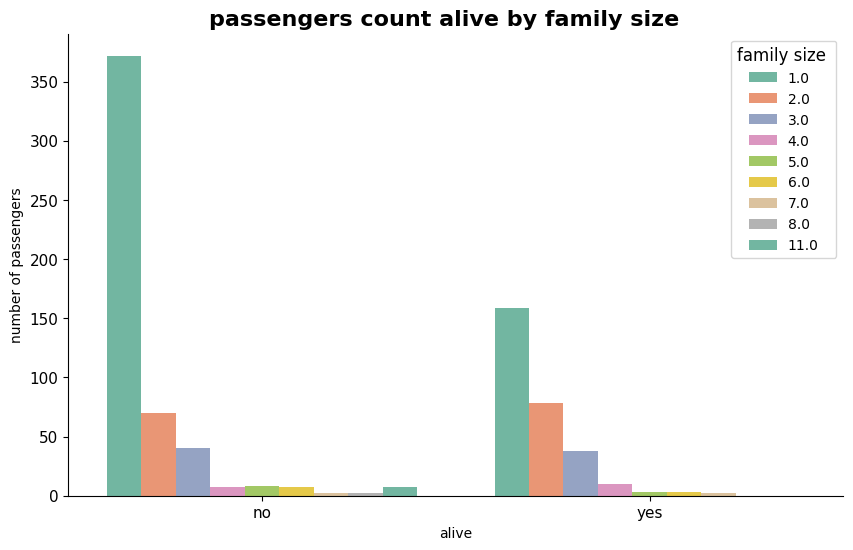

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='alive',hue='family_size',data=df,palette='Set2')
plt.title('passengers count alive by family size   ',fontsize=16, fontweight='bold')
plt.xlabel('alive')
plt.ylabel('number of passengers')
plt.legend(title='family size ', title_fontsize=12, fontsize=10)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
sns.despine()

---

This section explores how family size influenced the likelihood of survival on the Titanic.  
The variable family_size was calculated as:  
family_size = sibsp + parch + 1  
so it represents the total number of family members a passenger had onboard.

### Key Findings

- Passengers traveling alone (family_size = 1) had the *lowest* survival rate.  
  Being alone may have meant less support or lower priority during evacuation.

- Small families (2 to 4 members) showed the *highest* survival rates.  
  This group seems to have had the best balance: not alone, but also not too large to slow evacuation.

- Large families (5+ members) had significantly *lower* survival rates.  
  Coordinating multiple family members—especially children—likely made escaping more difficult.

### Conclusion

There is a clear relationship between family size and survival probability.  
The best outcomes were observed in medium-sized families, while individuals traveling alone and very large families had much poorer survival rates.

Family structure appears to have played a meaningful role during the evacuation, shaping who had the greatest chance of survival.

---